In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from data_preparation_functions import *

In [2]:
#### cannot use this function due to SSH issues when scraping the data 
#### check below for the error 
#### using the same dataset from kaggle
#### important to understand beautifulsoup scraper

# def grab_epl_data():
#     # Connect to football-data.co.uk
#     res = requests.get("http://www.football-data.co.uk/englandm.php")

#     # Create a BeautifulSoup object
#     soup = BeautifulSoup(res.content, 'lxml')

#     # Find the tables with the links to the data in them.
#     table = soup.find_all('table', {'align': 'center', 'cellspacing': '0', 'width': '800'})[1]
#     body = table.find_all('td', {'valign': 'top'})[1]

#     # Grab the urls for the csv files
#     links = [link.get('href') for link in body.find_all('a')]
#     links_text = [link_text.text for link_text in body.find_all('a')]

#     data_urls = []

#     # Create a list of links
#     prefix = 'http://www.football-data.co.uk/'
#     for i, text in enumerate(links_text):
#         if text == 'Premier League':
#             data_urls.append(prefix + links[i])

#     # Get rid of last 11 uls as these don't include match stats and odds, and we
#     # only want from 2005 onwards
#     data_urls = data_urls[:-12]

#     df = pd.DataFrame()

#     # Iterate over the urls
#     for url in data_urls:
#         # Get the season and make it a column
#         season = url.split('/')[4]

#         print(f"Getting data for season {season}")

#         # Read the data from the url into a DataFrame
#         temp_df = pd.read_csv(url)
#         temp_df['season'] = season

#         # Create helpful columns like Day, Month, Year, Date etc. so that our data is clean
#         temp_df = (temp_df.dropna(axis='columns', thresh=temp_df.shape[0]-30)
#                           .assign(Day=lambda df: df.Date.str.split('/').str[0],
#                                   Month=lambda df: df.Date.str.split('/').str[1],
#                                   Year=lambda df: df.Date.str.split('/').str[2])
#                           .assign(Date=lambda df: df.Month + '/' + df.Day + '/' + df.Year)
#                           .assign(Date=lambda df: pd.to_datetime(df.Date))
#                           .dropna())

#         # Append the temp_df to the main df
#         df = df.append(temp_df, sort=True)

#     # Drop all NAs
#     df = df.dropna(axis=1).dropna().sort_values(by='Date')
#     print("Finished grabbing data.")

#     return df

In [3]:
# df = grab_epl_data()

SSLError: HTTPSConnectionPool(host='www.football-data.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)')))

In [4]:
df = pd.read_csv("final_dataset.csv")
df

Div        Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0     E0  11/08/2023  20:00      Burnley       Man City   0.0   3.0   A   0.0   
1     E0  12/08/2023  12:30      Arsenal  Nott'm Forest   2.0   1.0   H   2.0   
2     E0  12/08/2023  15:00  Bournemouth       West Ham   1.0   1.0   D   0.0   
3     E0  12/08/2023  15:00     Brighton          Luton   4.0   1.0   H   1.0   
4     E0  12/08/2023  15:00      Everton         Fulham   0.0   1.0   A   0.0   
...   ..         ...    ...          ...            ...   ...   ...  ..   ...   
4064  E0  11/05/2014    NaN      Norwich        Arsenal   0.0   2.0   A   0.0   
4065  E0  11/05/2014    NaN  Southampton     Man United   1.0   1.0   D   1.0   
4066  E0  11/05/2014    NaN   Sunderland        Swansea   1.0   3.0   A   0.0   
4067  E0  11/05/2014    NaN    Tottenham    Aston Villa   3.0   0.0   H   3.0   
4068  E0  11/05/2014    NaN    West Brom          Stoke   1.0   2.0   A   0.0   

      HTAG HTR    Referee    HS    AS   HST  AST    HF    AF    HC   AC   HY  \
0      2.0   A   C Pawson   6.0  17.0   1.0  8.0  11.0   8.0   6.0  5.0  0.0   
1      0.0   H   M Oliver  15.0   6.0   7.0  2.0  12.0  12.0   8.0  3.0  2.0   
2      0.0   D   P Bankes  14.0  16.0   5.0  3.0   9.0  14.0  10.0  4.0  1.0   
3      0.0   H    D Coote  27.0   9.0  12.0  3.0  11.0  12.0   6.0  7.0  2.0   
4      0.0   D  S Attwell  19.0   9.0   9.0  2.0  12.0   6.0  10.0  4.0  0.0   
...    ...  ..        ...   ...   ...   ...  ...   ...   ...   ...  ...  ...   
4064   0.0   D    L Mason  11.0  14.0   5.0  8.0   6.0   5.0   4.0  4.0  1.0   
4065   0.0   H     M Dean  15.0   8.0   6.0  2.0  16.0   5.0   6.0  2.0  3.0   
4066   2.0   A      C Foy  20.0   8.0   4.0  4.0  14.0  15.0   6.0  3.0  2.0   
4067   0.0   H     J Moss  12.0   4.0   6.0  1.0  11.0  11.0   5.0  1.0  1.0   
4068   1.0   A  L Probert  17.0  15.0   4.0  4.0   4.0   7.0  11.0  6.0  0.0   

       AY   HR   AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH   IWD  \
0     0.0  1.0  0.0   8.00    5.5   1.33  8.75  5.25   1.34  8.00  5.50   
1     2.0  0.0  0.0   1.18    7.0  15.00  1.17  7.50  15.50  1.20  7.25   
2     4.0  0.0  0.0   2.70    3.4   2.55  2.65  3.40   2.55  2.70  3.45   
3     2.0  0.0  0.0   1.33    5.5   9.00  1.32  5.50   9.00  1.35  5.25   
4     2.0  0.0  0.0   2.20    3.4   3.30  2.20  3.40   3.25  2.25  3.40   
...   ...  ...  ...    ...    ...    ...   ...   ...    ...   ...   ...   
4064  0.0  0.0  0.0   4.50    3.8   1.85  4.00  3.50   1.87  4.00  3.60   
4065  2.0  0.0  0.0   2.63    3.5   2.80  2.60  3.30   2.60  2.60  3.20   
4066  3.0  0.0  0.0   2.30    3.4   3.40  2.20  3.40   3.10  2.00  3.30   
4067  0.0  0.0  0.0   1.50    4.5   7.50  1.45  4.50   6.25  1.45  4.00   
4068  0.0  0.0  0.0   2.10    3.6   3.75  2.00  3.40   3.60  2.10  3.30   

        IWA   PSH   PSD    PSA   WHH   WHD    WHA   VCH   VCD    VCA  MaxH  \
0      1.35  8.58  5.51   1.37  8.00  5.00   1.25  9.50  5.25   1.33  9.50   
1     14.00  1.18  7.86  15.67  1.12  6.50  12.00  1.14  7.50  17.00  1.21   
2      2.60  2.70  3.47   2.71  2.62  3.20   2.30  2.63  3.30   2.63  2.80   
3      8.50  1.33  5.65   9.61  1.25  4.60   8.50  1.29  5.25  10.00  1.36   
4      3.25  2.27  3.45   3.35  2.10  3.20   3.00  2.20  3.30   3.25  2.30   
...     ...   ...   ...    ...   ...   ...    ...   ...   ...    ...   ...   
4064   1.80  4.62  3.81   1.85  4.33  3.40   1.85  4.40  3.80   1.87   NaN   
4065   2.60  2.60  3.65   2.76  2.62  3.10   2.80  2.55  3.50   2.88   NaN   
4066   3.60  2.40  3.40   3.23  2.30  3.20   3.20  2.38  3.40   3.25   NaN   
4067   7.00  1.47  4.64   7.97  1.50  3.80   7.50  1.50  4.50   7.50   NaN   
4068   3.30  2.06  3.66   3.82  2.10  3.25   3.60  2.05  3.60   3.90   NaN   

      MaxD   MaxA  AvgH  AvgD   AvgA  B365>2.5  B365<2.5  ...   VCCH  VCCD  \
0     5.68   1.39  9.02  5.35   1.35      1.67      2.20  ...  10.50  5.25   
1     8.50  17.50  1.18  7.64  15.67      1.44      2.75  ...   1.22  7.00   

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [6]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'LBH', 'LBD', 'LBA', 'SJH',
       'SJD', 'SJA'],
      dtype='object', length=130)

In [7]:
df = df.assign(homeWin=lambda df: df.apply(lambda row: 1 if row.FTHG > row.FTAG else 0, axis='columns'),
                draw=lambda df: df.apply(lambda row: 1 if row.FTHG == row.FTAG else 0, axis='columns'),
                   awayWin=lambda df: df.apply(lambda row: 1 if row.FTHG < row.FTAG else 0, axis='columns')
              )

In [8]:
df

Div       Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0     E0 2023-08-11  20:00      Burnley       Man City   0.0   3.0   A   0.0   
1     E0 2023-08-12  12:30      Arsenal  Nott'm Forest   2.0   1.0   H   2.0   
2     E0 2023-08-12  15:00  Bournemouth       West Ham   1.0   1.0   D   0.0   
3     E0 2023-08-12  15:00     Brighton          Luton   4.0   1.0   H   1.0   
4     E0 2023-08-12  15:00      Everton         Fulham   0.0   1.0   A   0.0   
...   ..        ...    ...          ...            ...   ...   ...  ..   ...   
4064  E0 2014-05-11    NaN      Norwich        Arsenal   0.0   2.0   A   0.0   
4065  E0 2014-05-11    NaN  Southampton     Man United   1.0   1.0   D   1.0   
4066  E0 2014-05-11    NaN   Sunderland        Swansea   1.0   3.0   A   0.0   
4067  E0 2014-05-11    NaN    Tottenham    Aston Villa   3.0   0.0   H   3.0   
4068  E0 2014-05-11    NaN    West Brom          Stoke   1.0   2.0   A   0.0   

      HTAG HTR    Referee    HS    AS   HST  AST    HF    AF    HC   AC   HY  \
0      2.0   A   C Pawson   6.0  17.0   1.0  8.0  11.0   8.0   6.0  5.0  0.0   
1      0.0   H   M Oliver  15.0   6.0   7.0  2.0  12.0  12.0   8.0  3.0  2.0   
2      0.0   D   P Bankes  14.0  16.0   5.0  3.0   9.0  14.0  10.0  4.0  1.0   
3      0.0   H    D Coote  27.0   9.0  12.0  3.0  11.0  12.0   6.0  7.0  2.0   
4      0.0   D  S Attwell  19.0   9.0   9.0  2.0  12.0   6.0  10.0  4.0  0.0   
...    ...  ..        ...   ...   ...   ...  ...   ...   ...   ...  ...  ...   
4064   0.0   D    L Mason  11.0  14.0   5.0  8.0   6.0   5.0   4.0  4.0  1.0   
4065   0.0   H     M Dean  15.0   8.0   6.0  2.0  16.0   5.0   6.0  2.0  3.0   
4066   2.0   A      C Foy  20.0   8.0   4.0  4.0  14.0  15.0   6.0  3.0  2.0   
4067   0.0   H     J Moss  12.0   4.0   6.0  1.0  11.0  11.0   5.0  1.0  1.0   
4068   1.0   A  L Probert  17.0  15.0   4.0  4.0   4.0   7.0  11.0  6.0  0.0   

       AY   HR   AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH   IWD  \
0     0.0  1.0  0.0   8.00    5.5   1.33  8.75  5.25   1.34  8.00  5.50   
1     2.0  0.0  0.0   1.18    7.0  15.00  1.17  7.50  15.50  1.20  7.25   
2     4.0  0.0  0.0   2.70    3.4   2.55  2.65  3.40   2.55  2.70  3.45   
3     2.0  0.0  0.0   1.33    5.5   9.00  1.32  5.50   9.00  1.35  5.25   
4     2.0  0.0  0.0   2.20    3.4   3.30  2.20  3.40   3.25  2.25  3.40   
...   ...  ...  ...    ...    ...    ...   ...   ...    ...   ...   ...   
4064  0.0  0.0  0.0   4.50    3.8   1.85  4.00  3.50   1.87  4.00  3.60   
4065  2.0  0.0  0.0   2.63    3.5   2.80  2.60  3.30   2.60  2.60  3.20   
4066  3.0  0.0  0.0   2.30    3.4   3.40  2.20  3.40   3.10  2.00  3.30   
4067  0.0  0.0  0.0   1.50    4.5   7.50  1.45  4.50   6.25  1.45  4.00   
4068  0.0  0.0  0.0   2.10    3.6   3.75  2.00  3.40   3.60  2.10  3.30   

        IWA   PSH   PSD    PSA   WHH   WHD    WHA   VCH   VCD    VCA  MaxH  \
0      1.35  8.58  5.51   1.37  8.00  5.00   1.25  9.50  5.25   1.33  9.50   
1     14.00  1.18  7.86  15.67  1.12  6.50  12.00  1.14  7.50  17.00  1.21   
2      2.60  2.70  3.47   2.71  2.62  3.20   2.30  2.63  3.30   2.63  2.80   
3      8.50  1.33  5.65   9.61  1.25  4.60   8.50  1.29  5.25  10.00  1.36   
4      3.25  2.27  3.45   3.35  2.10  3.20   3.00  2.20  3.30   3.25  2.30   
...     ...   ...   ...    ...   ...   ...    ...   ...   ...    ...   ...   
4064   1.80  4.62  3.81   1.85  4.33  3.40   1.85  4.40  3.80   1.87   NaN   
4065   2.60  2.60  3.65   2.76  2.62  3.10   2.80  2.55  3.50   2.88   NaN   
4066   3.60  2.40  3.40   3.23  2.30  3.20   3.20  2.38  3.40   3.25   NaN   
4067   7.00  1.47  4.64   7.97  1.50  3.80   7.50  1.50  4.50   7.50   NaN   
4068   3.30  2.06  3.66   3.82  2.10  3.25   3.60  2.05  3.60   3.90   NaN   

      MaxD   MaxA  AvgH  AvgD   AvgA  B365>2.5  B365<2.5  ...  MaxCH  MaxCD  \
0     5.68   1.39  9.02  5.35   1.35      1.67      2.20  ...  10.50   5.81   
1     8.50  17.50  1.18  7.64  15.67      1.44      2.75  ...   1.22   8.40   
2     3.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069 entries, 0 to 4068
Columns: 133 entries, Div to awayWin
dtypes: datetime64[ns](1), float64(122), int64(3), object(7)
memory usage: 4.1+ MB


## Home Ground Advantage

### Need to create a season column in the dataset

In [10]:
def get_season(date):
    year = date.year
    month = date.month
    # Define the usual season start and end months
    season_start_month = 8
    season_end_month = 6
    
    # Special handling for the pandemic season
    pandemic_season_year = 2020
    pandemic_season_end_month = 7  # July
    
    # For months January to June, the season started in the previous year
    if month <= season_end_month:
        season_start_year = year - 1
    # For the pandemic-affected year, extend the season to include July
    elif year == pandemic_season_year and month == pandemic_season_end_month:
        season_start_year = year - 1
    # For months August to December, the season starts in the current year
    else:
        season_start_year = year

    season_end_year = season_start_year + 1
    # Format season as "YY/YY"
    return f'{str(season_start_year)[-2:]}/{str(season_end_year)[-2:]}'

In [11]:
df['season'] = df['Date'].apply(get_season)

In [12]:
df

Div       Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0     E0 2023-08-11  20:00      Burnley       Man City   0.0   3.0   A   0.0   
1     E0 2023-08-12  12:30      Arsenal  Nott'm Forest   2.0   1.0   H   2.0   
2     E0 2023-08-12  15:00  Bournemouth       West Ham   1.0   1.0   D   0.0   
3     E0 2023-08-12  15:00     Brighton          Luton   4.0   1.0   H   1.0   
4     E0 2023-08-12  15:00      Everton         Fulham   0.0   1.0   A   0.0   
...   ..        ...    ...          ...            ...   ...   ...  ..   ...   
4064  E0 2014-05-11    NaN      Norwich        Arsenal   0.0   2.0   A   0.0   
4065  E0 2014-05-11    NaN  Southampton     Man United   1.0   1.0   D   1.0   
4066  E0 2014-05-11    NaN   Sunderland        Swansea   1.0   3.0   A   0.0   
4067  E0 2014-05-11    NaN    Tottenham    Aston Villa   3.0   0.0   H   3.0   
4068  E0 2014-05-11    NaN    West Brom          Stoke   1.0   2.0   A   0.0   

      HTAG HTR    Referee    HS    AS   HST  AST    HF    AF    HC   AC   HY  \
0      2.0   A   C Pawson   6.0  17.0   1.0  8.0  11.0   8.0   6.0  5.0  0.0   
1      0.0   H   M Oliver  15.0   6.0   7.0  2.0  12.0  12.0   8.0  3.0  2.0   
2      0.0   D   P Bankes  14.0  16.0   5.0  3.0   9.0  14.0  10.0  4.0  1.0   
3      0.0   H    D Coote  27.0   9.0  12.0  3.0  11.0  12.0   6.0  7.0  2.0   
4      0.0   D  S Attwell  19.0   9.0   9.0  2.0  12.0   6.0  10.0  4.0  0.0   
...    ...  ..        ...   ...   ...   ...  ...   ...   ...   ...  ...  ...   
4064   0.0   D    L Mason  11.0  14.0   5.0  8.0   6.0   5.0   4.0  4.0  1.0   
4065   0.0   H     M Dean  15.0   8.0   6.0  2.0  16.0   5.0   6.0  2.0  3.0   
4066   2.0   A      C Foy  20.0   8.0   4.0  4.0  14.0  15.0   6.0  3.0  2.0   
4067   0.0   H     J Moss  12.0   4.0   6.0  1.0  11.0  11.0   5.0  1.0  1.0   
4068   1.0   A  L Probert  17.0  15.0   4.0  4.0   4.0   7.0  11.0  6.0  0.0   

       AY   HR   AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH   IWD  \
0     0.0  1.0  0.0   8.00    5.5   1.33  8.75  5.25   1.34  8.00  5.50   
1     2.0  0.0  0.0   1.18    7.0  15.00  1.17  7.50  15.50  1.20  7.25   
2     4.0  0.0  0.0   2.70    3.4   2.55  2.65  3.40   2.55  2.70  3.45   
3     2.0  0.0  0.0   1.33    5.5   9.00  1.32  5.50   9.00  1.35  5.25   
4     2.0  0.0  0.0   2.20    3.4   3.30  2.20  3.40   3.25  2.25  3.40   
...   ...  ...  ...    ...    ...    ...   ...   ...    ...   ...   ...   
4064  0.0  0.0  0.0   4.50    3.8   1.85  4.00  3.50   1.87  4.00  3.60   
4065  2.0  0.0  0.0   2.63    3.5   2.80  2.60  3.30   2.60  2.60  3.20   
4066  3.0  0.0  0.0   2.30    3.4   3.40  2.20  3.40   3.10  2.00  3.30   
4067  0.0  0.0  0.0   1.50    4.5   7.50  1.45  4.50   6.25  1.45  4.00   
4068  0.0  0.0  0.0   2.10    3.6   3.75  2.00  3.40   3.60  2.10  3.30   

        IWA   PSH   PSD    PSA   WHH   WHD    WHA   VCH   VCD    VCA  MaxH  \
0      1.35  8.58  5.51   1.37  8.00  5.00   1.25  9.50  5.25   1.33  9.50   
1     14.00  1.18  7.86  15.67  1.12  6.50  12.00  1.14  7.50  17.00  1.21   
2      2.60  2.70  3.47   2.71  2.62  3.20   2.30  2.63  3.30   2.63  2.80   
3      8.50  1.33  5.65   9.61  1.25  4.60   8.50  1.29  5.25  10.00  1.36   
4      3.25  2.27  3.45   3.35  2.10  3.20   3.00  2.20  3.30   3.25  2.30   
...     ...   ...   ...    ...   ...   ...    ...   ...   ...    ...   ...   
4064   1.80  4.62  3.81   1.85  4.33  3.40   1.85  4.40  3.80   1.87   NaN   
4065   2.60  2.60  3.65   2.76  2.62  3.10   2.80  2.55  3.50   2.88   NaN   
4066   3.60  2.40  3.40   3.23  2.30  3.20   3.20  2.38  3.40   3.25   NaN   
4067   7.00  1.47  4.64   7.97  1.50  3.80   7.50  1.50  4.50   7.50   NaN   
4068   3.30  2.06  3.66   3.82  2.10  3.25   3.60  2.05  3.60   3.90   NaN   

      MaxD   MaxA  AvgH  AvgD   AvgA  B365>2.5  B365<2.5  ...  MaxCD  MaxCA  \
0     5.68   1.39  9.02  5.35   1.35      1.67      2.20  ...   5.81   1.36   
1     8.50  17.50  1.18  7.64  15.67      1.44      2.75  ...   8.40  19.00   
2     3.

In [13]:
df = df[df['season'] != 'an/an']

In [14]:
season_column = df['season'].unique()
print(season_column)

['23/24' '22/23' '21/22' '20/21' '19/20' '18/19' '17/18' '16/17' '15/16'
 '14/15' '13/14']


In [15]:
win_rates = \
(df.groupby('season')
    .mean()
     # loc selects the columns of most importance for this new dataframe
     # the ':' symbol includes all rows of data from these columns
    .loc[:, ['homeWin', 'draw', 'awayWin']])

win_rates

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\549919199.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


homeWin      draw   awayWin
season                              
13/14   0.471053  0.205263  0.323684
14/15   0.452632  0.244737  0.302632
15/16   0.413158  0.281579  0.305263
16/17   0.492105  0.221053  0.286842
17/18   0.455263  0.260526  0.284211
18/19   0.476316  0.186842  0.336842
19/20   0.452632  0.242105  0.305263
20/21   0.378947  0.218421  0.402632
21/22   0.428947  0.231579  0.339474
22/23   0.484211  0.228947  0.286842
23/24   0.455224  0.197761  0.347015

## Findings

As we can see, winrates across the home team wins, draws and away team wins are very consistent. It seems that the home team wins around 46-47% of the time, the draw happens about 25% of the time, and the away team wins about 29% of the time. 

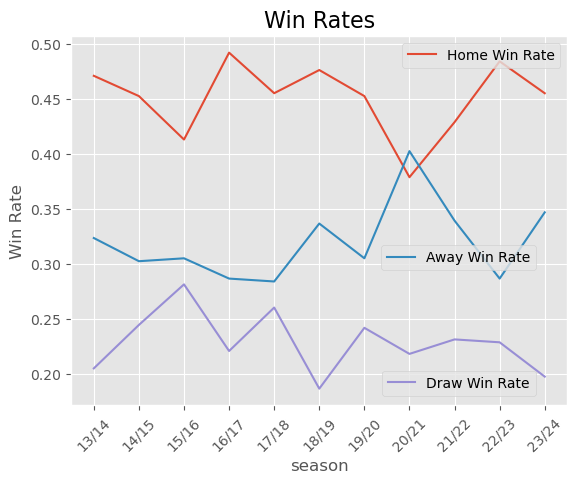

In [16]:
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)

home_line = ax.plot(win_rates.homeWin, label='Home Win Rate')
away_line = ax.plot(win_rates.awayWin, label='Away Win Rate')
draw_line = ax.plot(win_rates.draw, label='Draw Win Rate')
ax.set_xlabel("season")
ax.set_ylabel("Win Rate")
plt.title("Win Rates", fontsize=16)

plt.xticks(rotation=45)

home_legend = plt.legend(handles=home_line, loc='upper right', bbox_to_anchor=(1, 1))
ax = plt.gca().add_artist(home_legend)
away_legend = plt.legend(handles=away_line, loc='center right', bbox_to_anchor=(0.95, 0.4))
ax = plt.gca().add_artist(away_legend)
draw_legend = plt.legend(handles=draw_line, loc='center right', bbox_to_anchor=(0.95, 0.06))

Significant drop in the home winrate from the 20/21 season.

Could be worth having a look at which team has the best home ground advantage. Let's define HGA as (home win rate - away win rate). And then plot some of the big clubs' HGA against each other.

In [17]:
home_win_rates = \
(df.groupby(['HomeTeam'])
     .homeWin
     .mean())

away_win_rates = \
(df.groupby(['AwayTeam'])
    .awayWin
    .mean())


hga = (home_win_rates - away_win_rates).reset_index().rename(columns={0: 'HGA'}).sort_values(by='HGA', ascending=False)

In [18]:
hga.head(10)

HomeTeam       HGA
22     Nott'm Forest  0.269886
12              Hull  0.228070
26             Stoke  0.210526
23               QPR  0.210526
0            Arsenal  0.209142
29         Tottenham  0.191710
24  Sheffield United  0.189668
9            Everton  0.175142
20         Newcastle  0.166187
15         Liverpool  0.165194

Interesting to see that Nottingham Forest have the best home ground record. More than likely to do with the lack of seasons spent in the premier league. <br>
I will check this now.

In [19]:
team_season_counts = df.groupby('HomeTeam')['season'].nunique()

print(team_season_counts)

HomeTeam
Arsenal             11
Aston Villa          8
Bournemouth          7
Brentford            3
Brighton             7
Burnley              8
Cardiff              2
Chelsea             11
Crystal Palace      11
Everton             11
Fulham               5
Huddersfield         2
Hull                 3
Leeds                3
Leicester            9
Liverpool           11
Luton                1
Man City            11
Man United          11
Middlesbrough        1
Newcastle           10
Norwich              4
Nott'm Forest        2
QPR                  1
Sheffield United     3
Southampton         10
Stoke                5
Sunderland           4
Swansea              5
Tottenham           11
Watford              6
West Brom            6
West Ham            11
Wolves               6
Name: season, dtype: int64


We can see Nottingham Forest, QPR and Hull were all in the Premier League very irregularly compared to the other teams hence why their records may be skewed.

****

In [20]:
df['season'] = df['season'].astype(str)

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\1592107460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['season'].astype(str)


In [21]:
big_clubs = ['Liverpool', 'Man City', 'Man United', 'Chelsea', 'Arsenal']
home_win_rates_5 = df[df.HomeTeam.isin(big_clubs)].groupby(['HomeTeam', 'season']).homeWin.mean()
away_win_rates_5 = df[df.AwayTeam.isin(big_clubs)].groupby(['AwayTeam', 'season']).awayWin.mean()

hga_top_5 = home_win_rates_5 - away_win_rates_5

hga_top_5.unstack(level=0)

HomeTeam   Arsenal   Chelsea  Liverpool  Man City  Man United
season                                                       
13/14     0.105263  0.263158   0.315789  0.368421   -0.052632
14/15     0.105263  0.210526   0.105263  0.210526    0.421053
15/16     0.210526 -0.105263   0.000000  0.263158    0.263158
16/17     0.263158  0.210526   0.105263 -0.052632   -0.105263
17/18     0.578947  0.052632   0.157895  0.000000    0.263158
18/19     0.368421  0.157895   0.210526  0.210526    0.052632
19/20     0.315789  0.105263   0.210526  0.210526    0.105263
20/21    -0.105263 -0.052632   0.000000 -0.052632   -0.157895
21/22     0.210526 -0.157895   0.105263  0.052632    0.210526
22/23     0.105263  0.052632   0.368421  0.315789    0.368421
23/24     0.126374  0.059524   0.274725  0.021978    0.038462

## Plot the HGA among the top 5 clubs

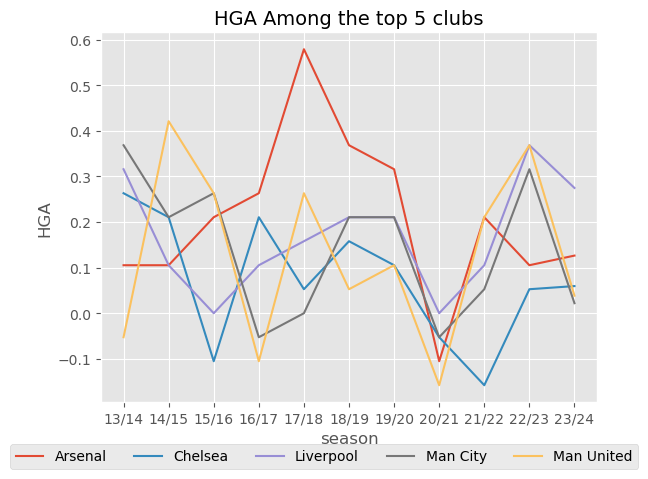

In [22]:
sns.lineplot(x='season', y='HGA', hue='team', data=hga_top_5.reset_index().rename(columns={0: 'HGA', 'HomeTeam': 'team'}))
plt.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.45, -0.2))
plt.title("HGA Among the top 5 clubs", fontsize=14)
plt.show()

In [23]:
df

Div       Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0     E0 2023-08-11  20:00      Burnley       Man City   0.0   3.0   A   0.0   
1     E0 2023-08-12  12:30      Arsenal  Nott'm Forest   2.0   1.0   H   2.0   
2     E0 2023-08-12  15:00  Bournemouth       West Ham   1.0   1.0   D   0.0   
3     E0 2023-08-12  15:00     Brighton          Luton   4.0   1.0   H   1.0   
4     E0 2023-08-12  15:00      Everton         Fulham   0.0   1.0   A   0.0   
...   ..        ...    ...          ...            ...   ...   ...  ..   ...   
4064  E0 2014-05-11    NaN      Norwich        Arsenal   0.0   2.0   A   0.0   
4065  E0 2014-05-11    NaN  Southampton     Man United   1.0   1.0   D   1.0   
4066  E0 2014-05-11    NaN   Sunderland        Swansea   1.0   3.0   A   0.0   
4067  E0 2014-05-11    NaN    Tottenham    Aston Villa   3.0   0.0   H   3.0   
4068  E0 2014-05-11    NaN    West Brom          Stoke   1.0   2.0   A   0.0   

      HTAG HTR    Referee    HS    AS   HST  AST    HF    AF    HC   AC   HY  \
0      2.0   A   C Pawson   6.0  17.0   1.0  8.0  11.0   8.0   6.0  5.0  0.0   
1      0.0   H   M Oliver  15.0   6.0   7.0  2.0  12.0  12.0   8.0  3.0  2.0   
2      0.0   D   P Bankes  14.0  16.0   5.0  3.0   9.0  14.0  10.0  4.0  1.0   
3      0.0   H    D Coote  27.0   9.0  12.0  3.0  11.0  12.0   6.0  7.0  2.0   
4      0.0   D  S Attwell  19.0   9.0   9.0  2.0  12.0   6.0  10.0  4.0  0.0   
...    ...  ..        ...   ...   ...   ...  ...   ...   ...   ...  ...  ...   
4064   0.0   D    L Mason  11.0  14.0   5.0  8.0   6.0   5.0   4.0  4.0  1.0   
4065   0.0   H     M Dean  15.0   8.0   6.0  2.0  16.0   5.0   6.0  2.0  3.0   
4066   2.0   A      C Foy  20.0   8.0   4.0  4.0  14.0  15.0   6.0  3.0  2.0   
4067   0.0   H     J Moss  12.0   4.0   6.0  1.0  11.0  11.0   5.0  1.0  1.0   
4068   1.0   A  L Probert  17.0  15.0   4.0  4.0   4.0   7.0  11.0  6.0  0.0   

       AY   HR   AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH   IWD  \
0     0.0  1.0  0.0   8.00    5.5   1.33  8.75  5.25   1.34  8.00  5.50   
1     2.0  0.0  0.0   1.18    7.0  15.00  1.17  7.50  15.50  1.20  7.25   
2     4.0  0.0  0.0   2.70    3.4   2.55  2.65  3.40   2.55  2.70  3.45   
3     2.0  0.0  0.0   1.33    5.5   9.00  1.32  5.50   9.00  1.35  5.25   
4     2.0  0.0  0.0   2.20    3.4   3.30  2.20  3.40   3.25  2.25  3.40   
...   ...  ...  ...    ...    ...    ...   ...   ...    ...   ...   ...   
4064  0.0  0.0  0.0   4.50    3.8   1.85  4.00  3.50   1.87  4.00  3.60   
4065  2.0  0.0  0.0   2.63    3.5   2.80  2.60  3.30   2.60  2.60  3.20   
4066  3.0  0.0  0.0   2.30    3.4   3.40  2.20  3.40   3.10  2.00  3.30   
4067  0.0  0.0  0.0   1.50    4.5   7.50  1.45  4.50   6.25  1.45  4.00   
4068  0.0  0.0  0.0   2.10    3.6   3.75  2.00  3.40   3.60  2.10  3.30   

        IWA   PSH   PSD    PSA   WHH   WHD    WHA   VCH   VCD    VCA  MaxH  \
0      1.35  8.58  5.51   1.37  8.00  5.00   1.25  9.50  5.25   1.33  9.50   
1     14.00  1.18  7.86  15.67  1.12  6.50  12.00  1.14  7.50  17.00  1.21   
2      2.60  2.70  3.47   2.71  2.62  3.20   2.30  2.63  3.30   2.63  2.80   
3      8.50  1.33  5.65   9.61  1.25  4.60   8.50  1.29  5.25  10.00  1.36   
4      3.25  2.27  3.45   3.35  2.10  3.20   3.00  2.20  3.30   3.25  2.30   
...     ...   ...   ...    ...   ...   ...    ...   ...   ...    ...   ...   
4064   1.80  4.62  3.81   1.85  4.33  3.40   1.85  4.40  3.80   1.87   NaN   
4065   2.60  2.60  3.65   2.76  2.62  3.10   2.80  2.55  3.50   2.88   NaN   
4066   3.60  2.40  3.40   3.23  2.30  3.20   3.20  2.38  3.40   3.25   NaN   
4067   7.00  1.47  4.64   7.97  1.50  3.80   7.50  1.50  4.50   7.50   NaN   
4068   3.30  2.06  3.66   3.82  2.10  3.25   3.60  2.05  3.60   3.90   NaN   

      MaxD   MaxA  AvgH  AvgD   AvgA  B365>2.5  B365<2.5  ...  MaxCD  MaxCA  \
0     5.68   1.39  9.02  5.35   1.35      1.67      2.20  ...   5.81   1.36   
1     8.50  17.50  1.18  7.64  15.67      1.44      2.75  ...   8.40  19.00   
2     3.

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


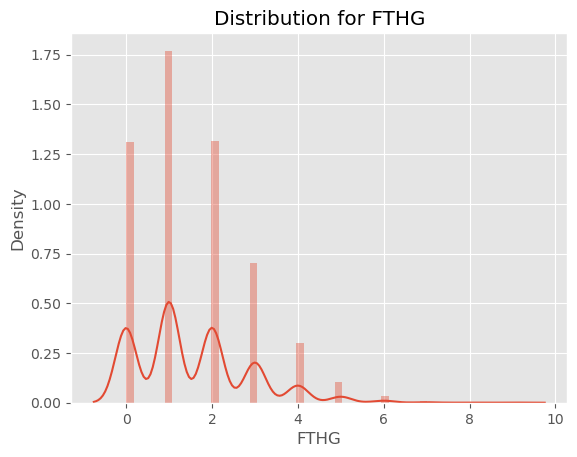

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


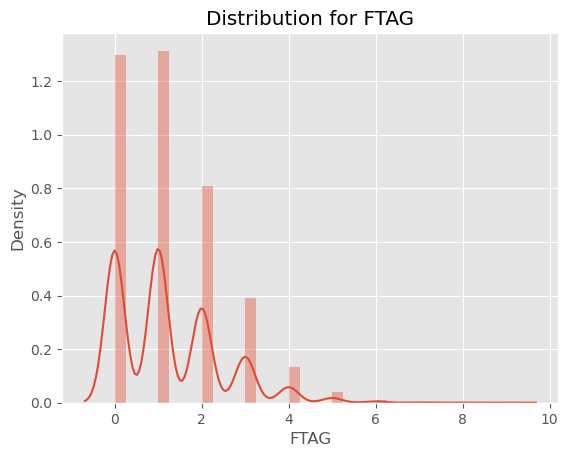

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


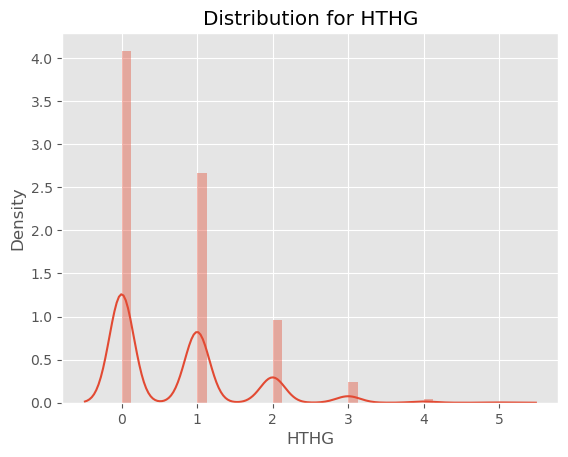

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


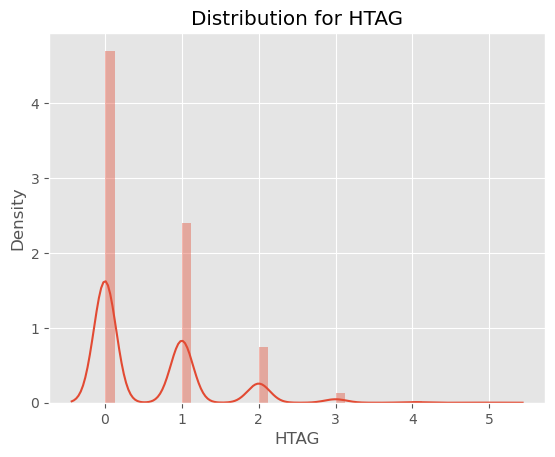

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


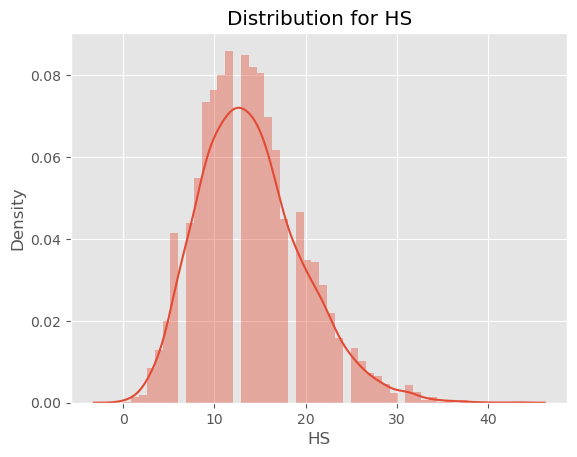

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


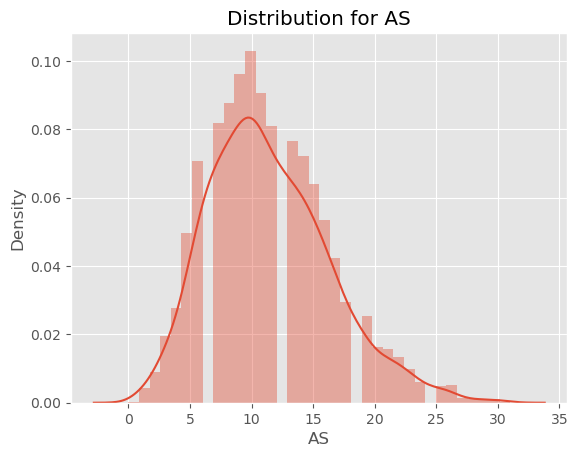

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


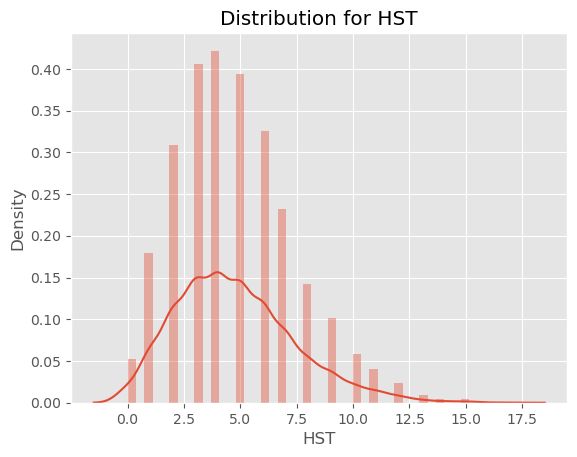

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


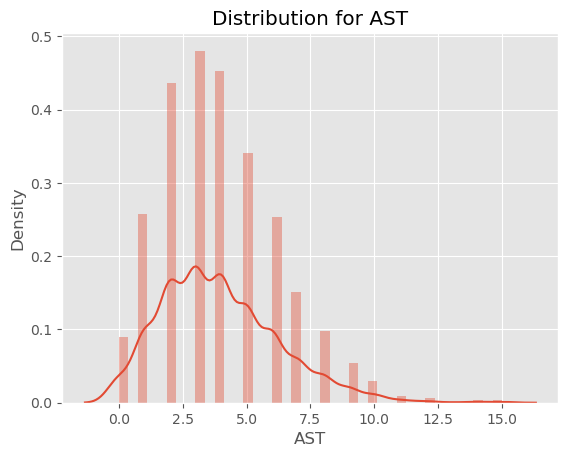

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


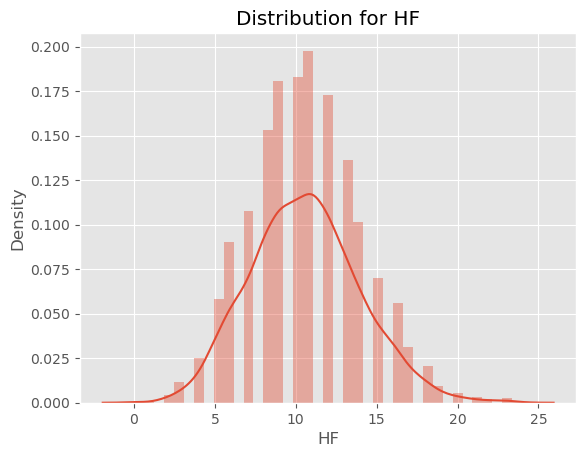

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


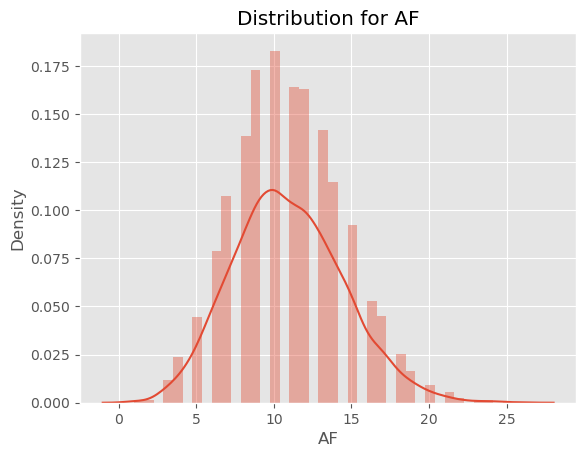

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


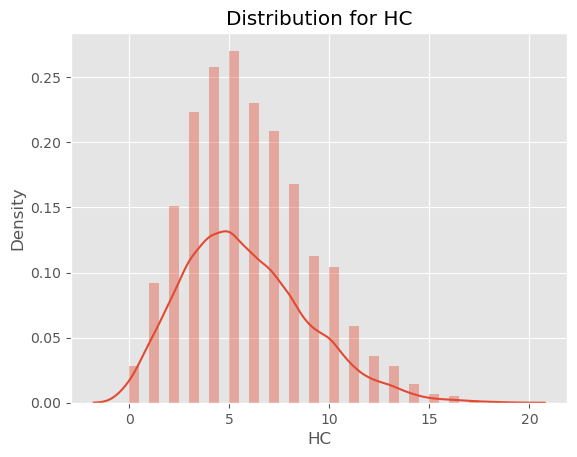

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


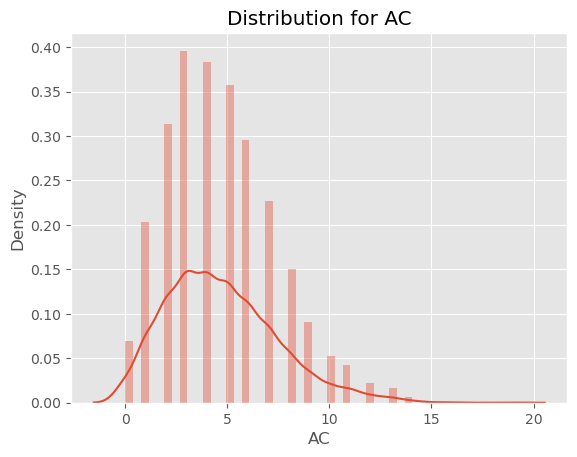

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


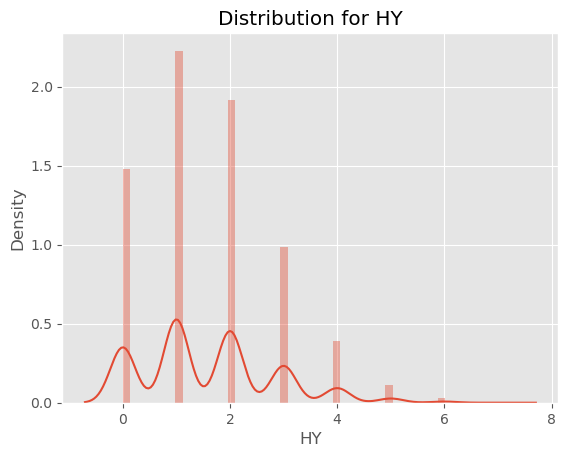

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


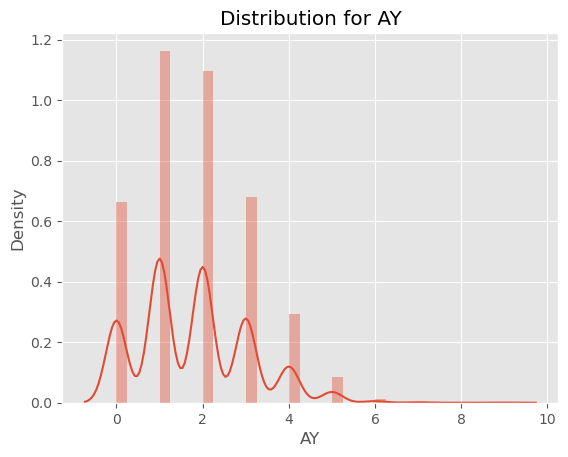

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


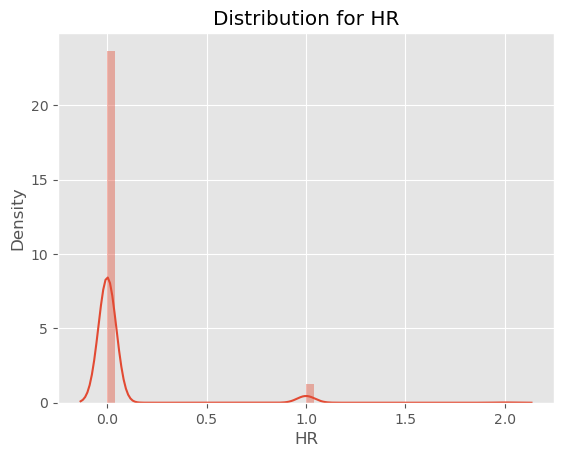

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


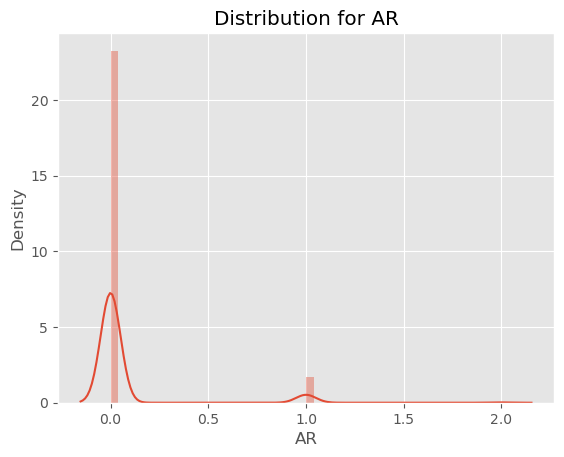

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


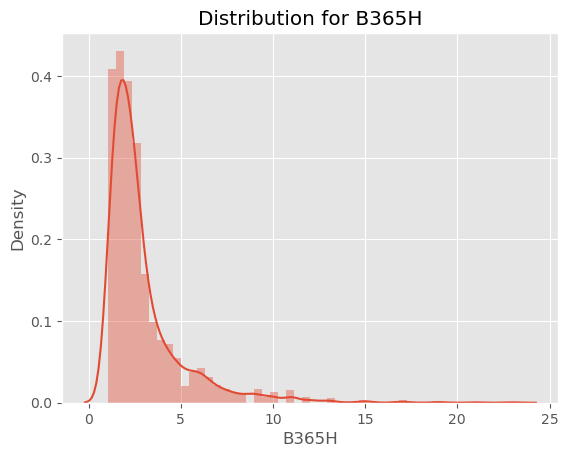

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


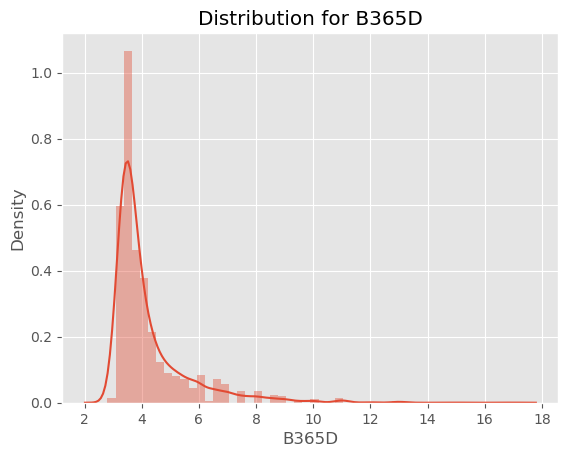

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


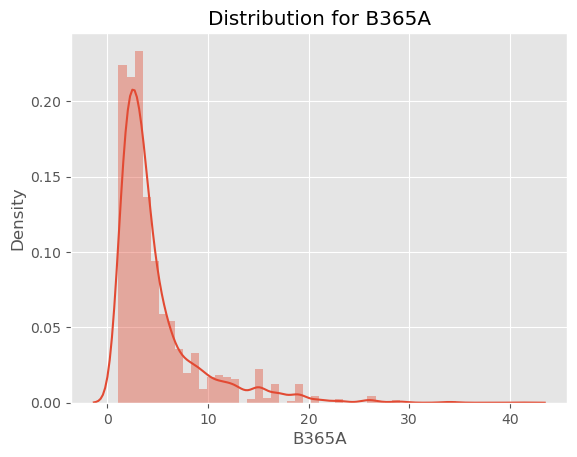

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


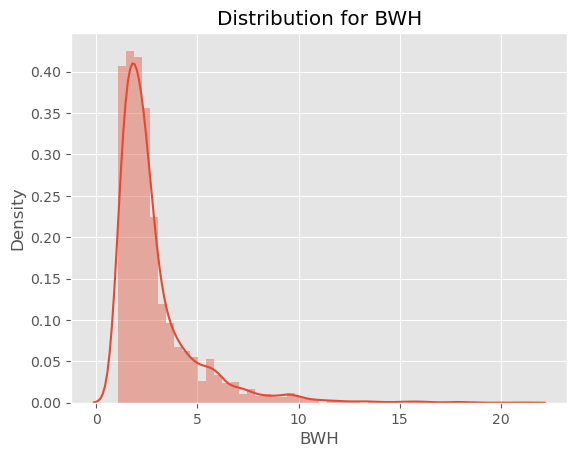

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


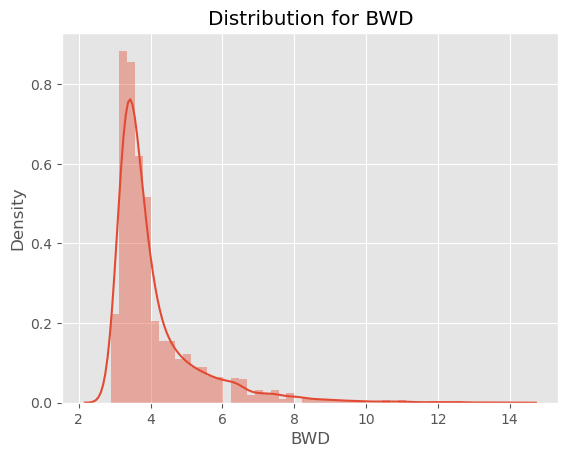

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


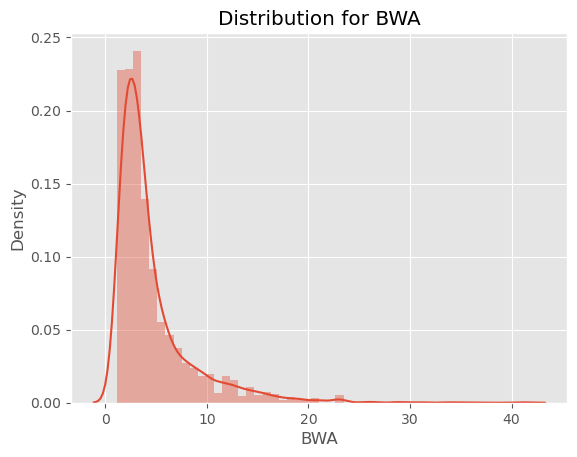

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


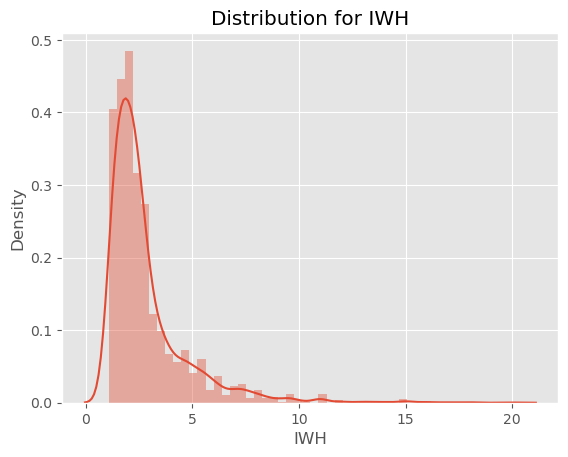

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


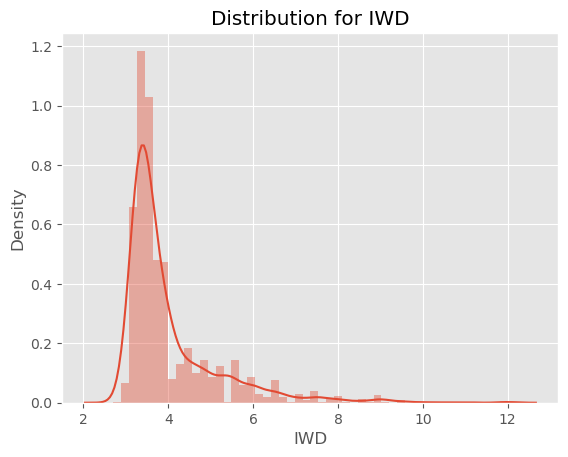

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


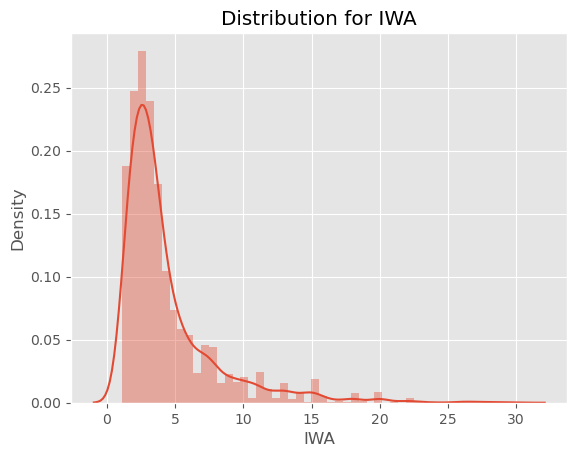

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


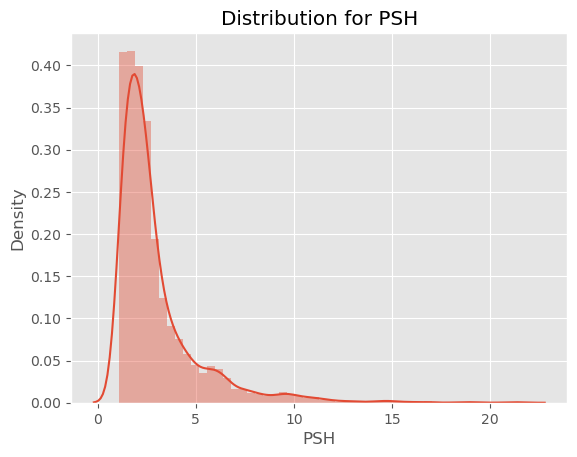

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


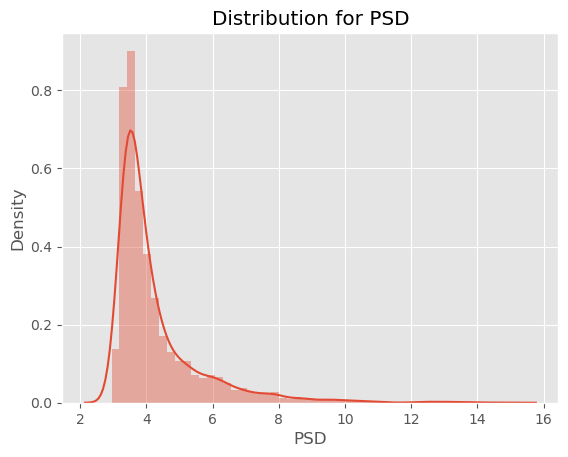

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


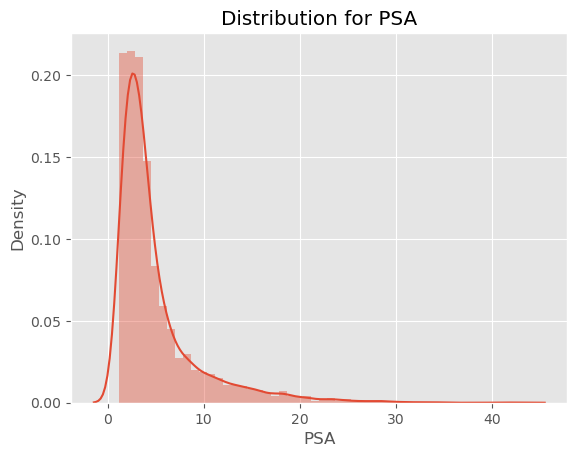

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


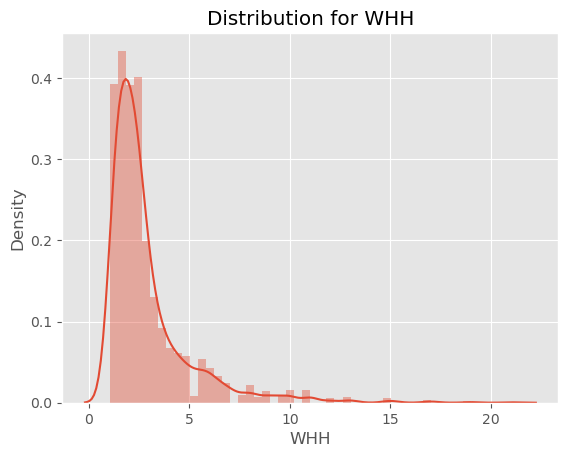

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


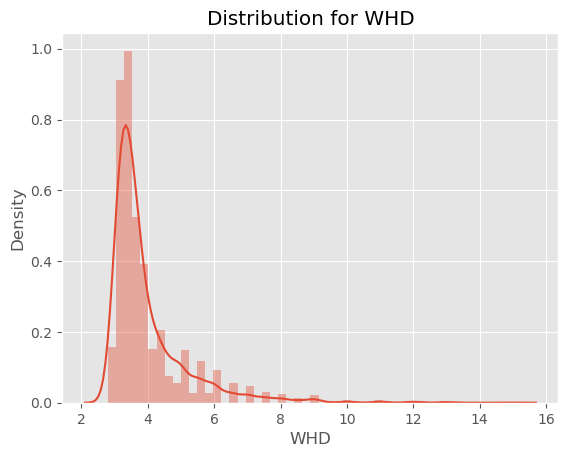

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


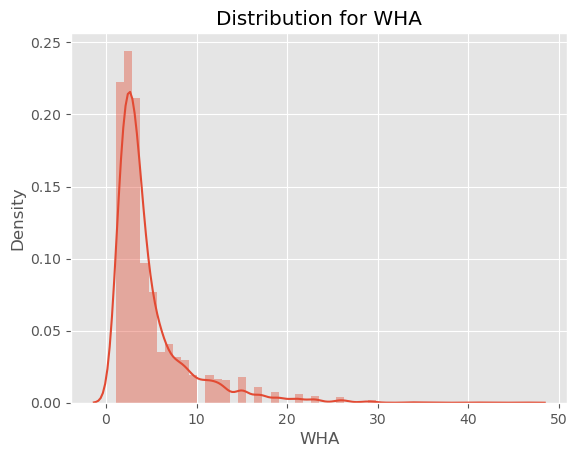

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


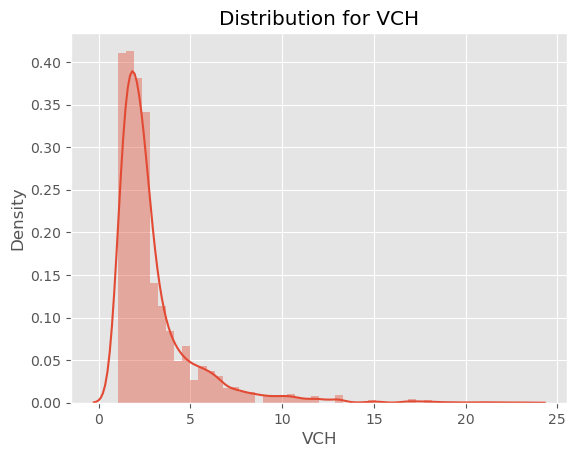

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


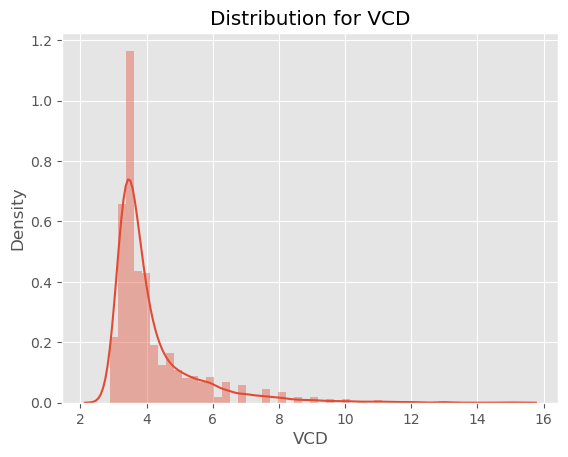

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


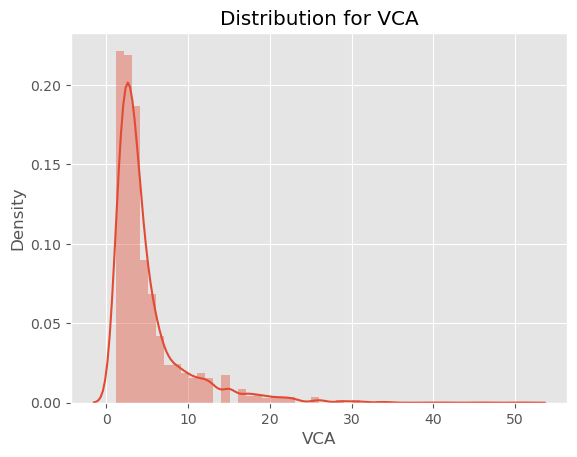

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


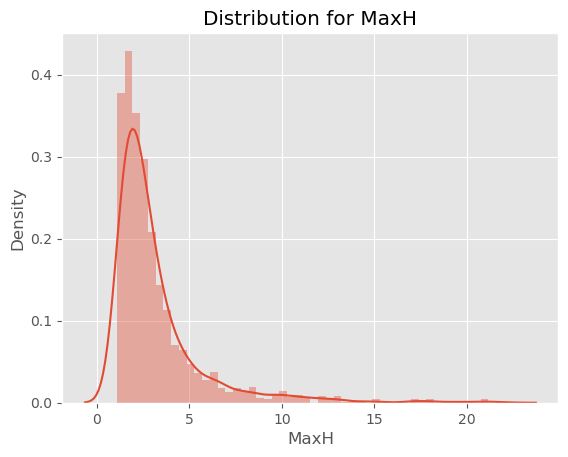

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


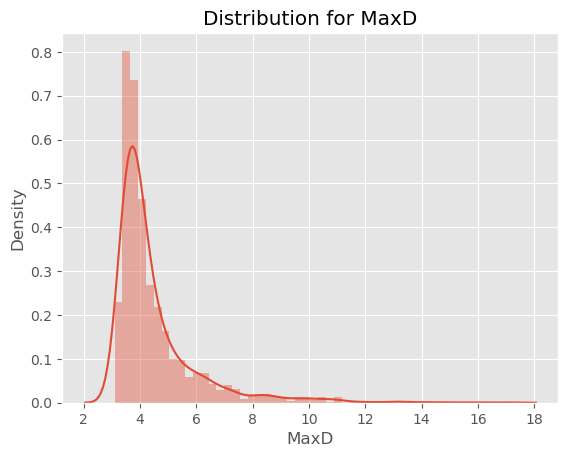

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


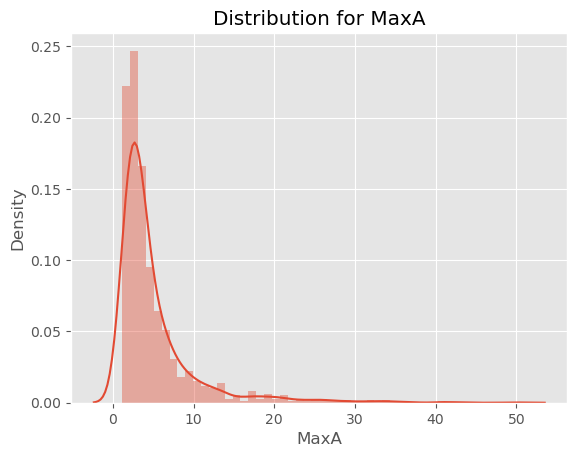

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


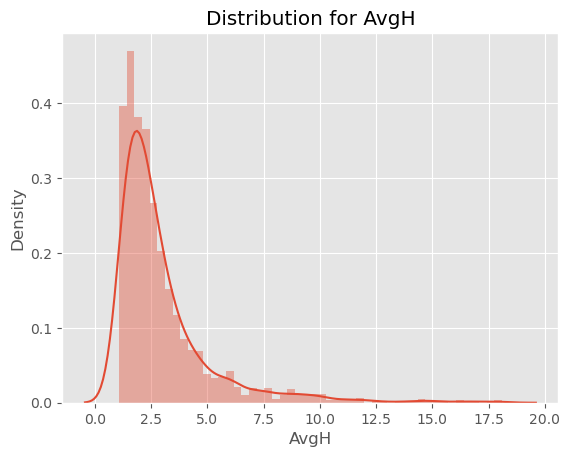

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


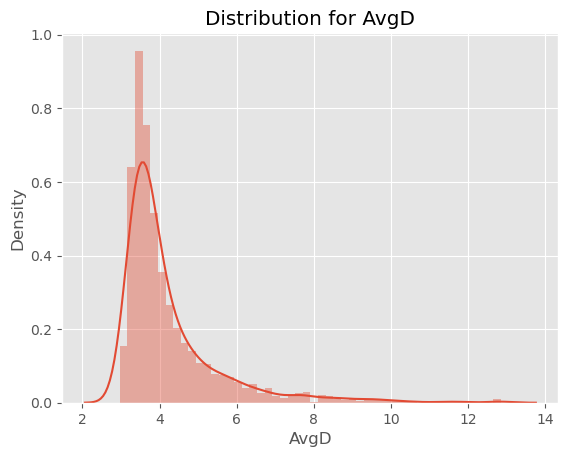

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


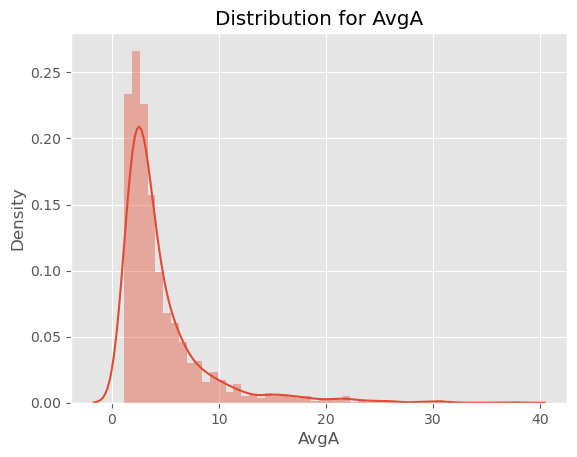

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


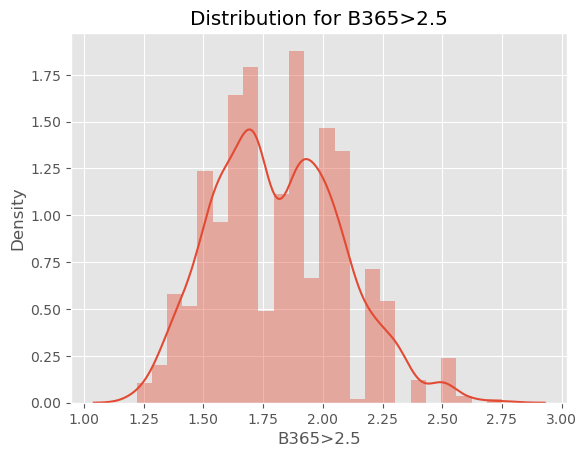

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


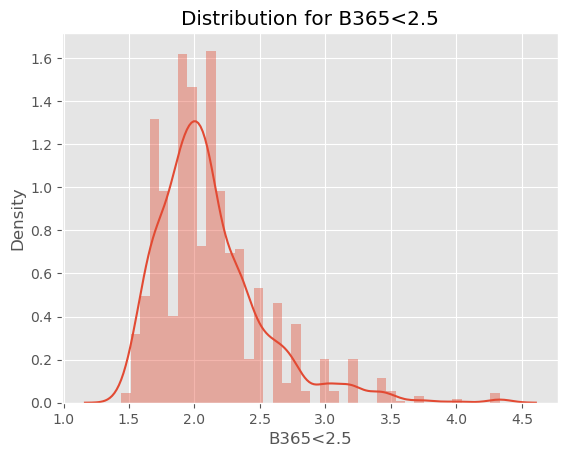

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


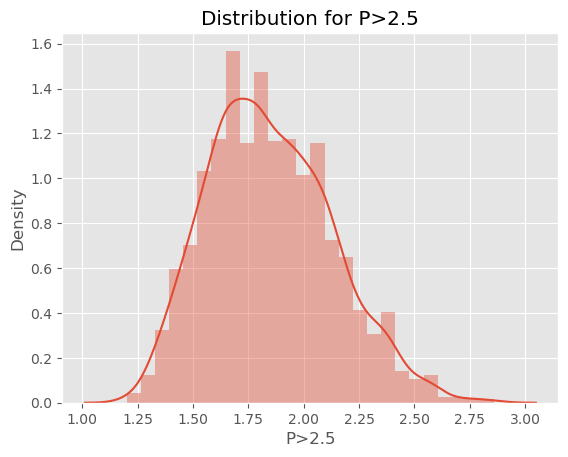

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


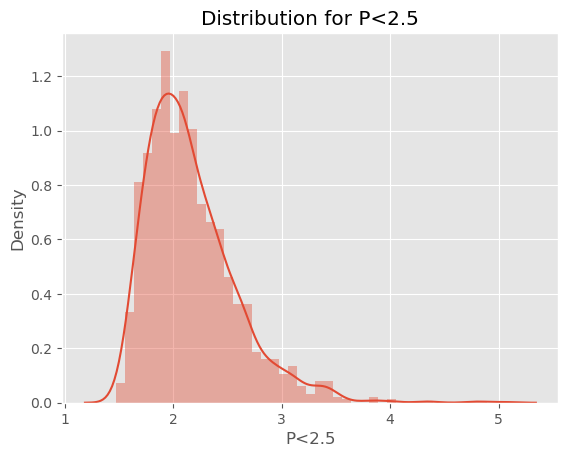

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


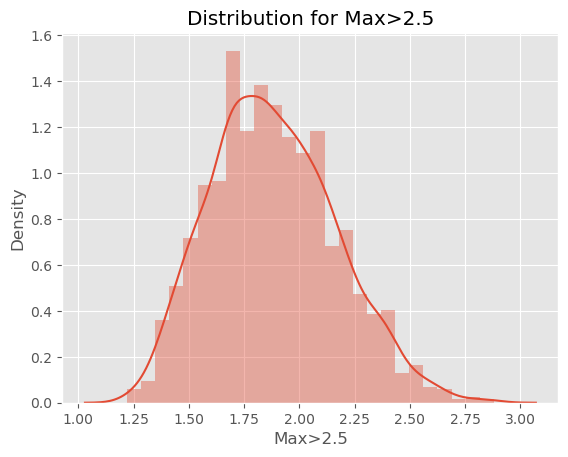

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


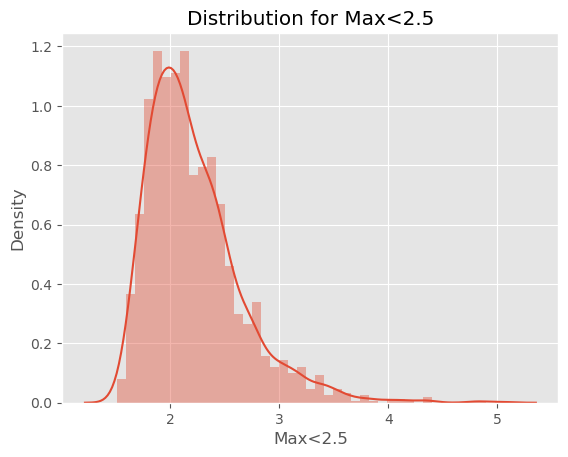

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


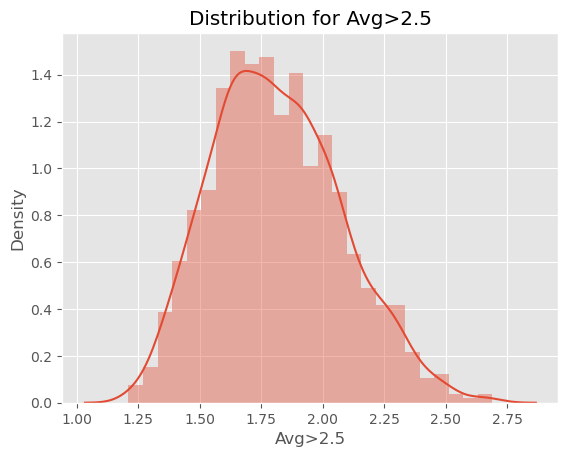

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


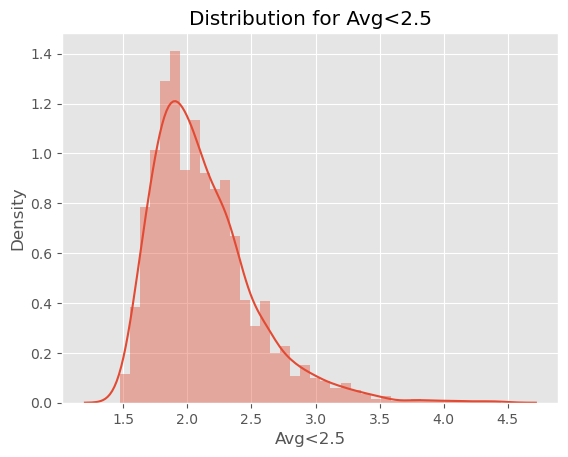

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


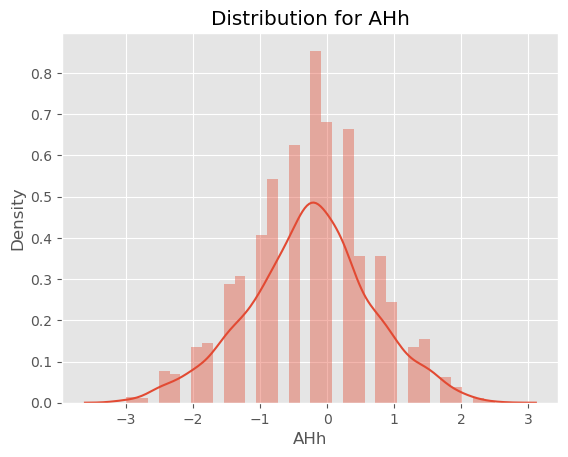

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


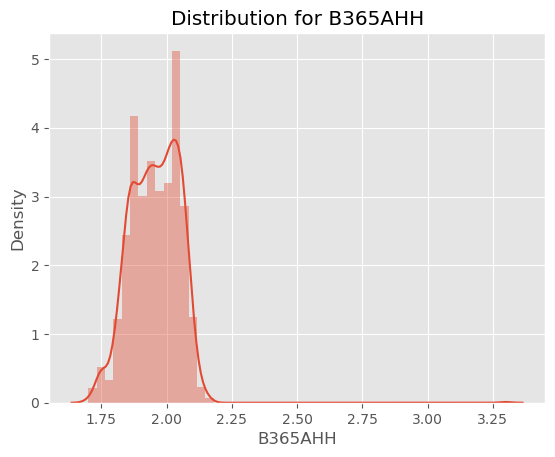

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


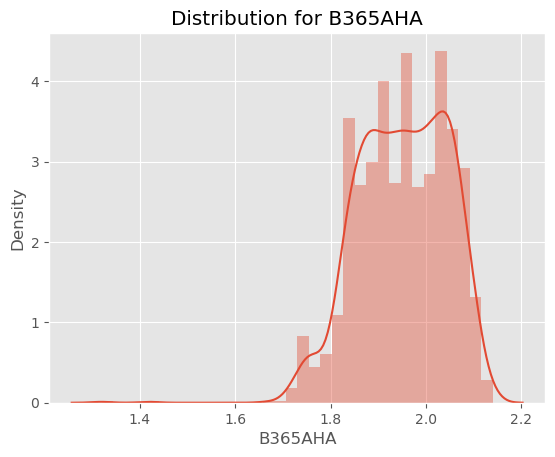

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


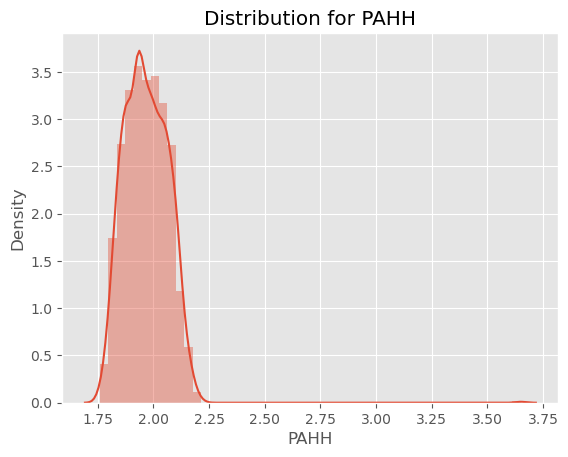

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


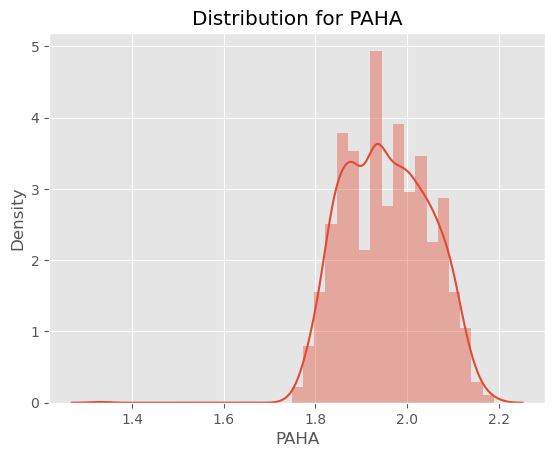

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


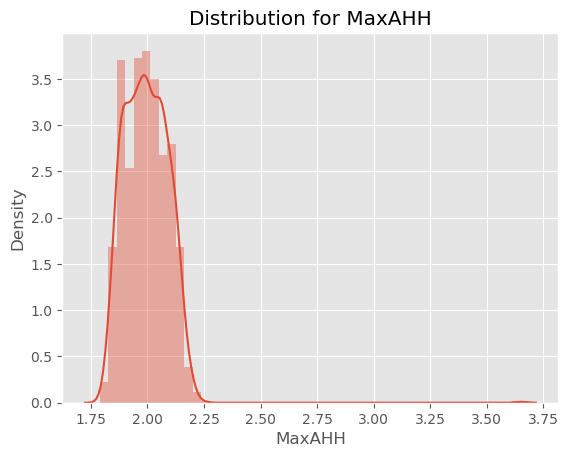

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


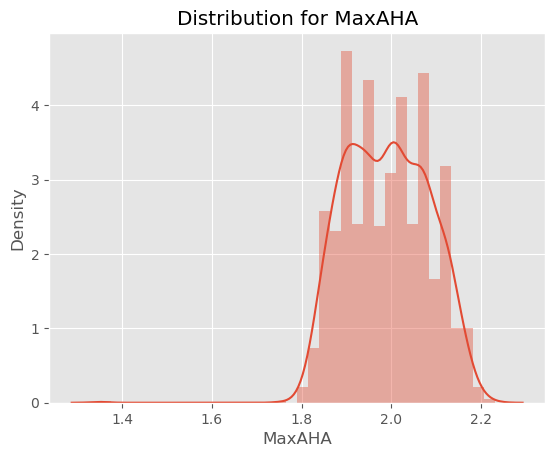

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


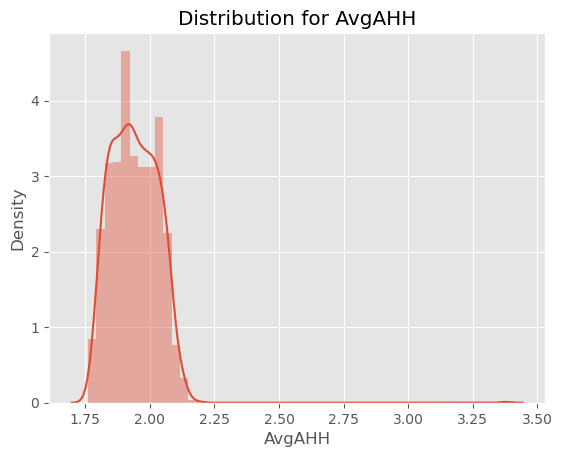

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


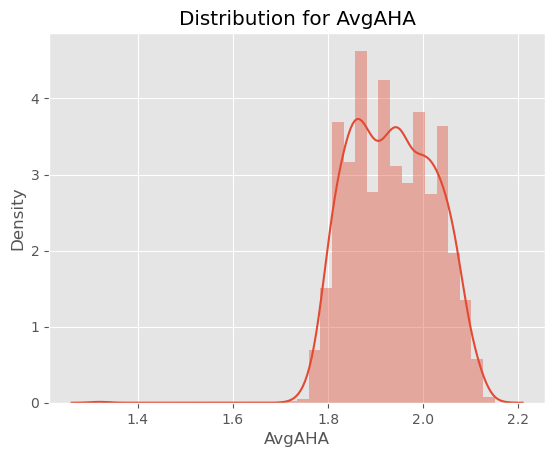

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


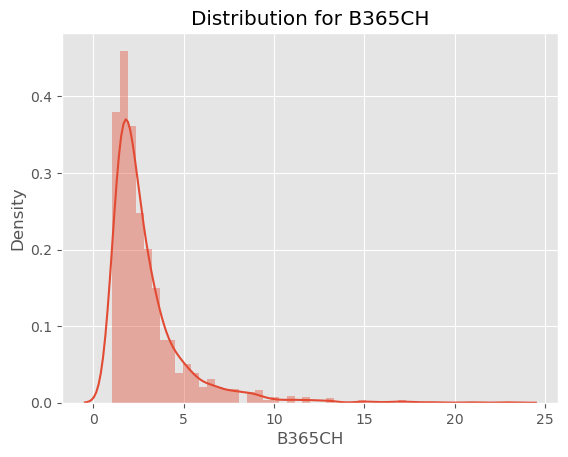

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


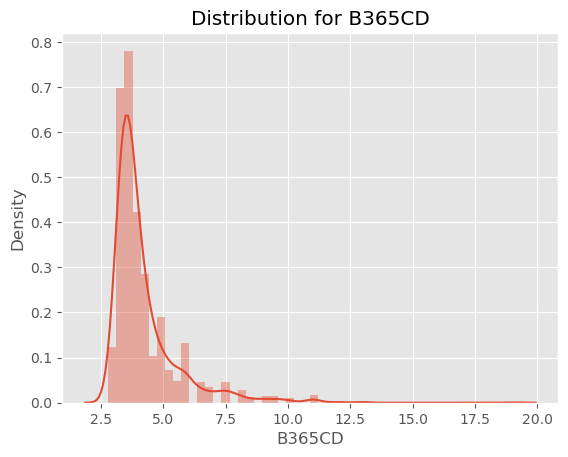

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


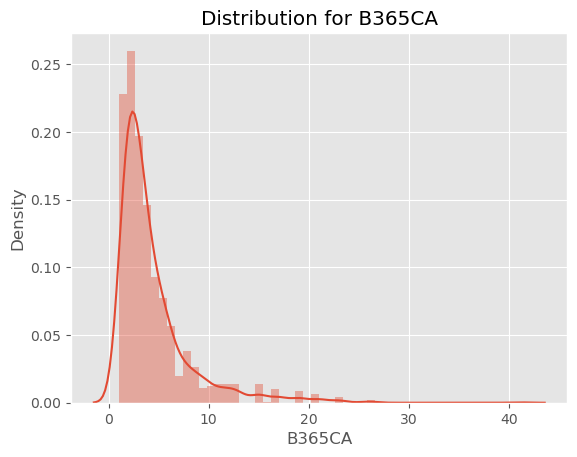

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


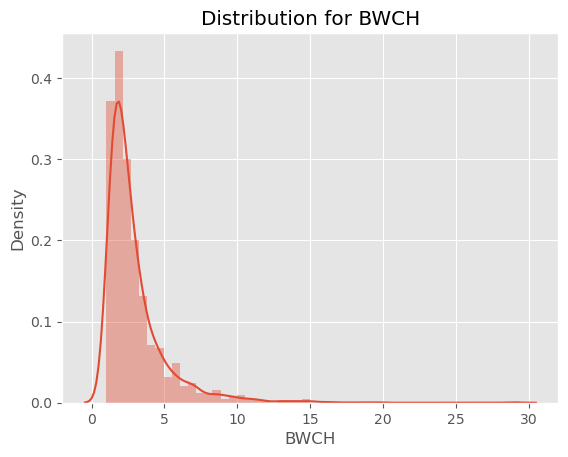

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


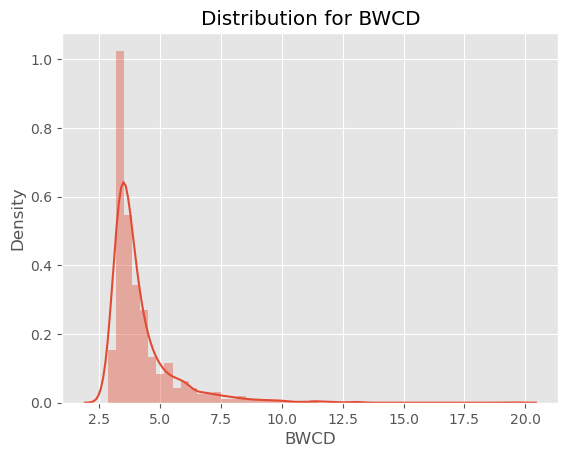

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


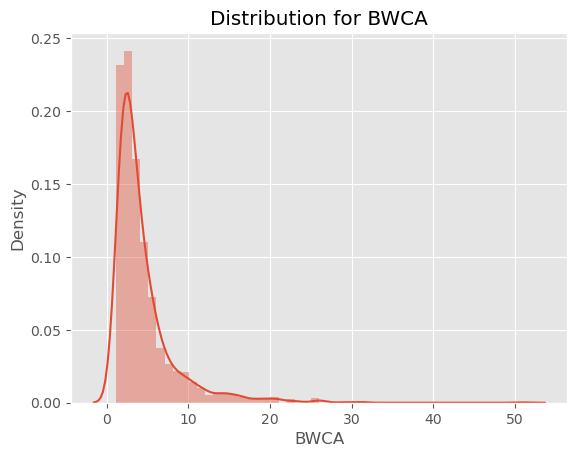

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


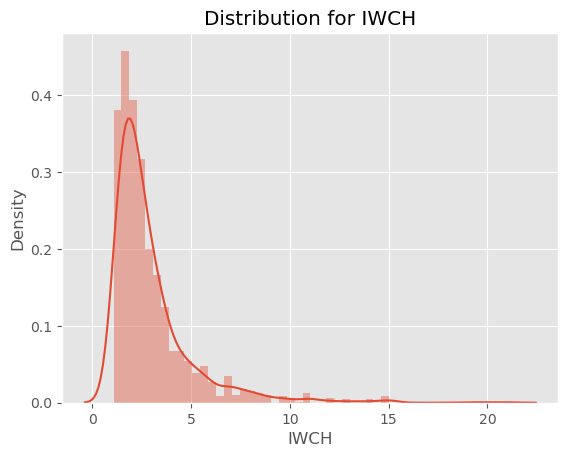

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


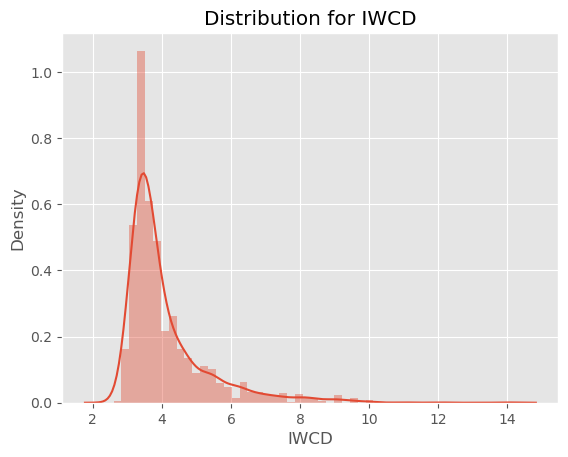

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


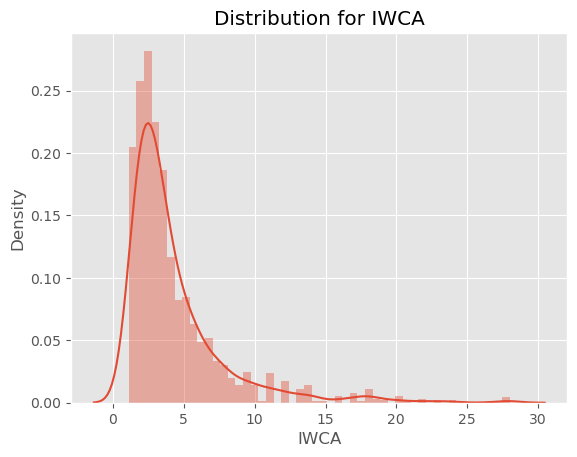

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


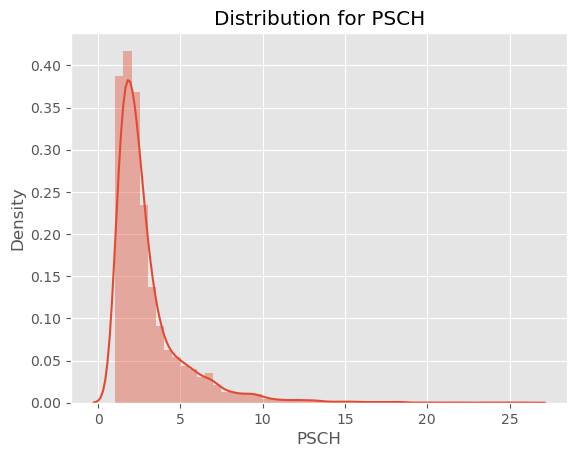

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


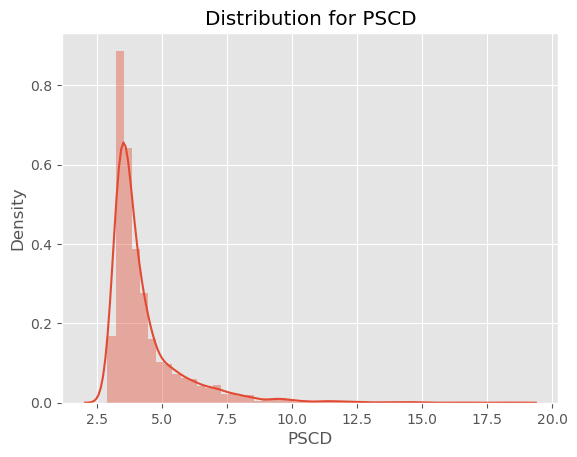

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


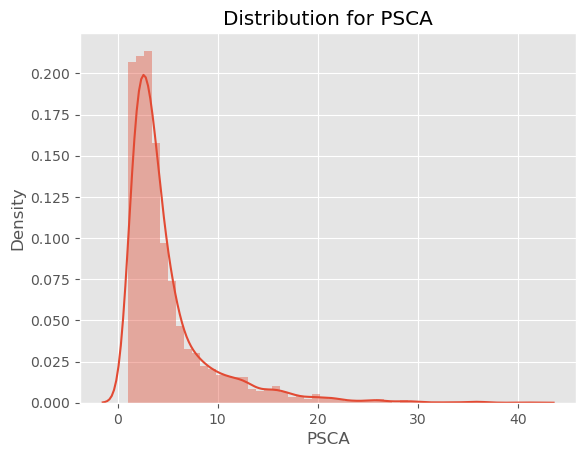

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


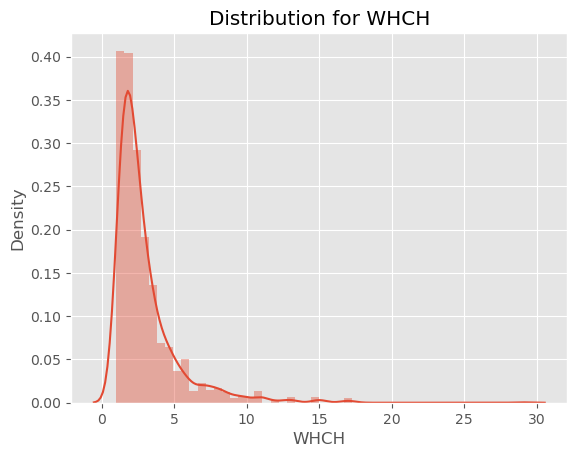

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


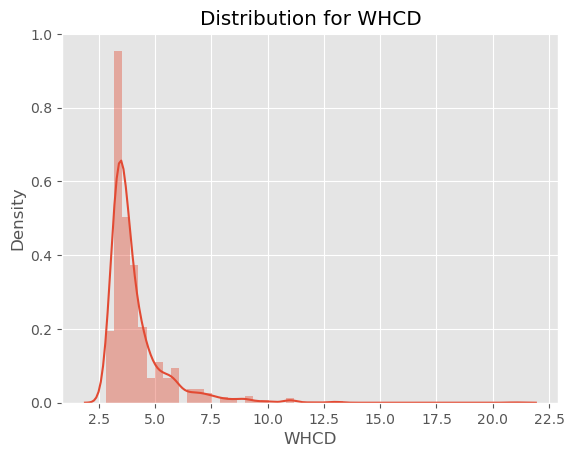

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


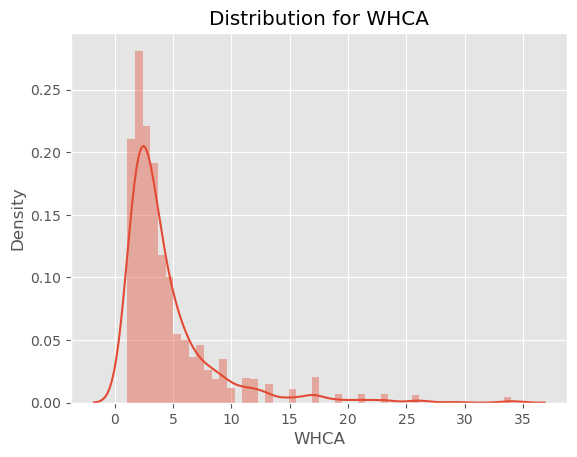

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


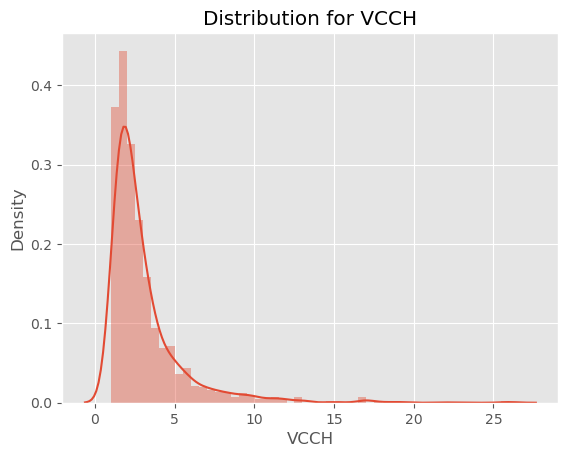

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


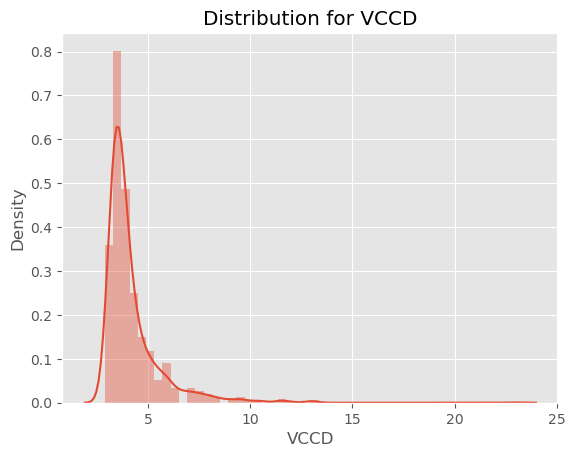

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


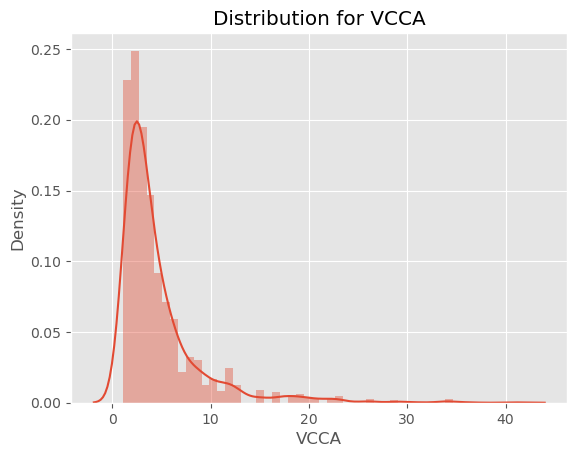

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


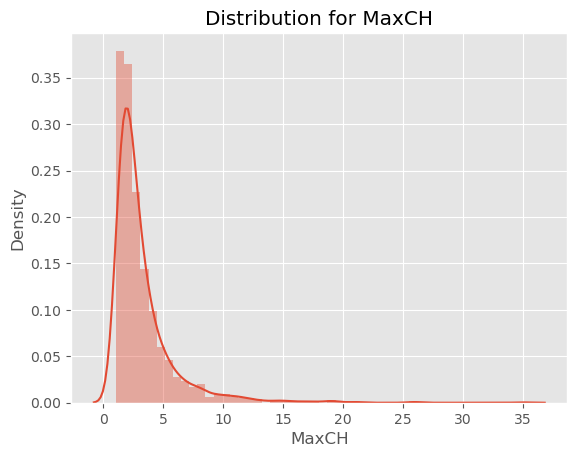

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


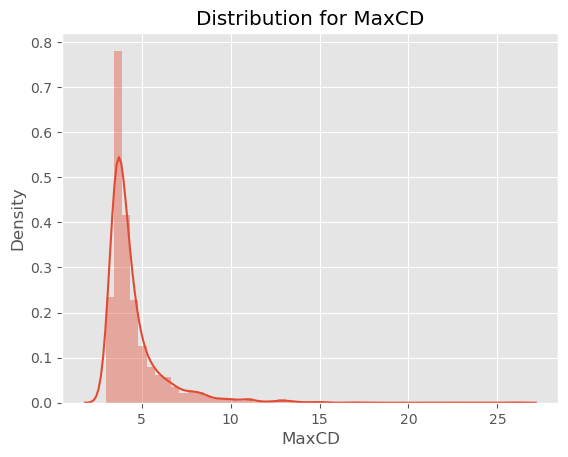

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


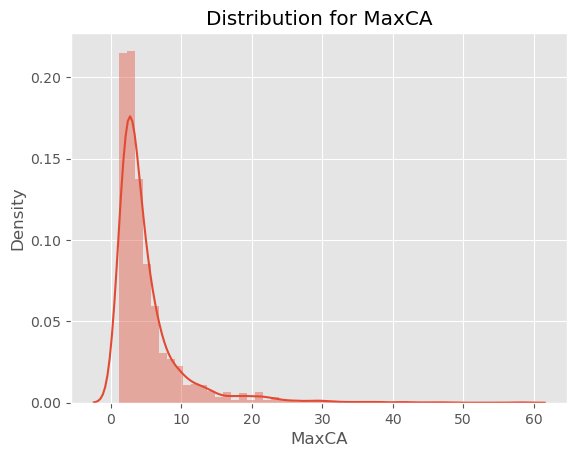

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


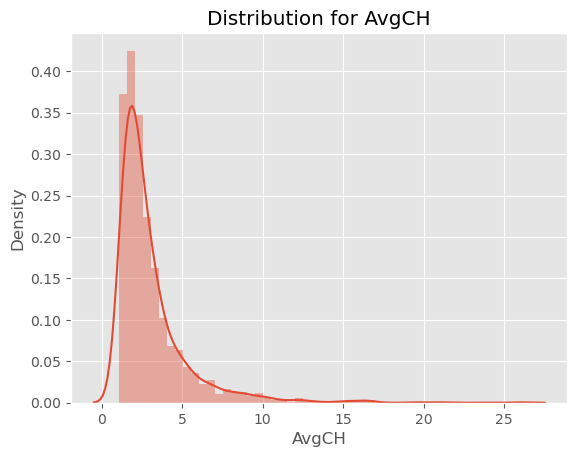

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


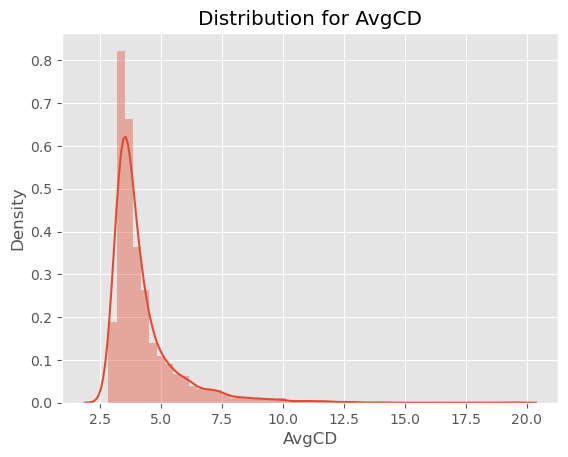

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


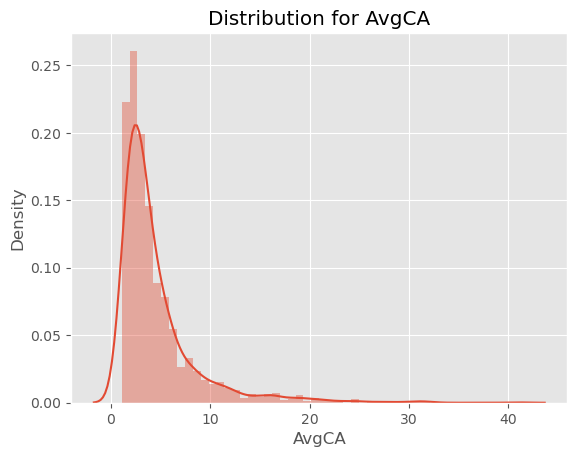

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


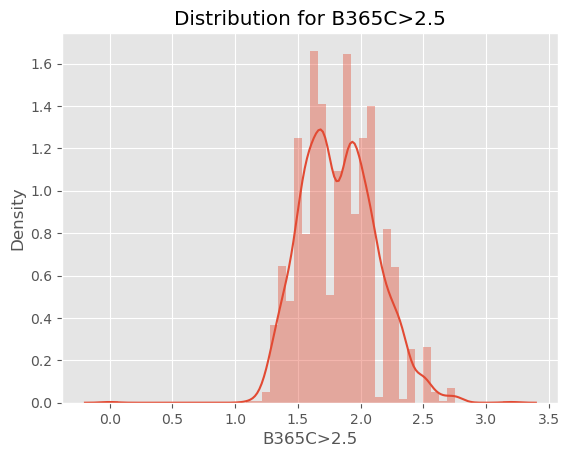

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


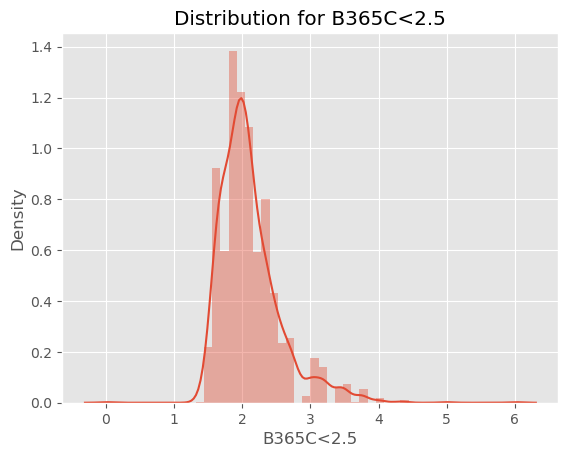

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


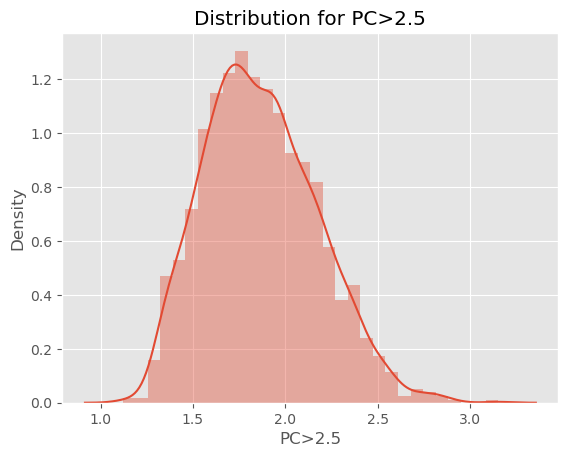

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


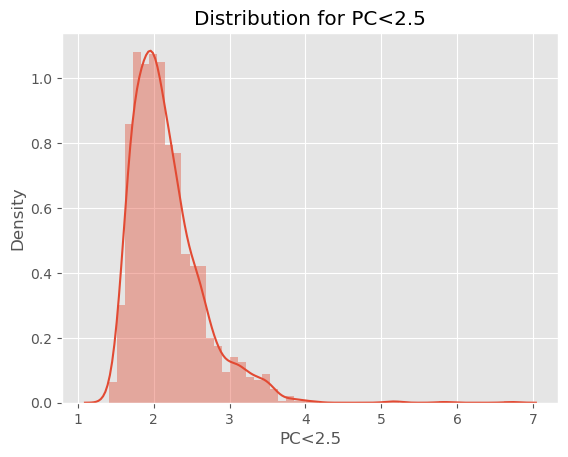

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


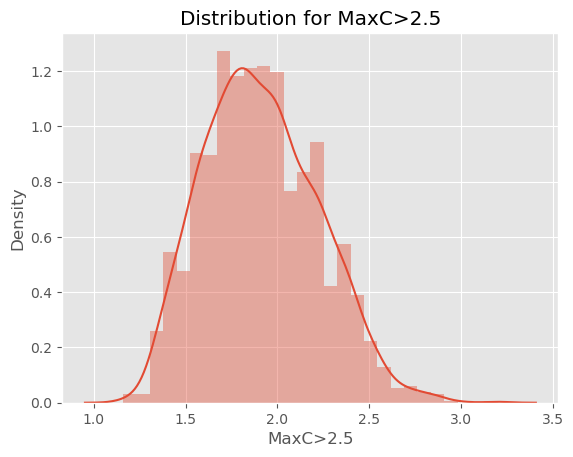

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


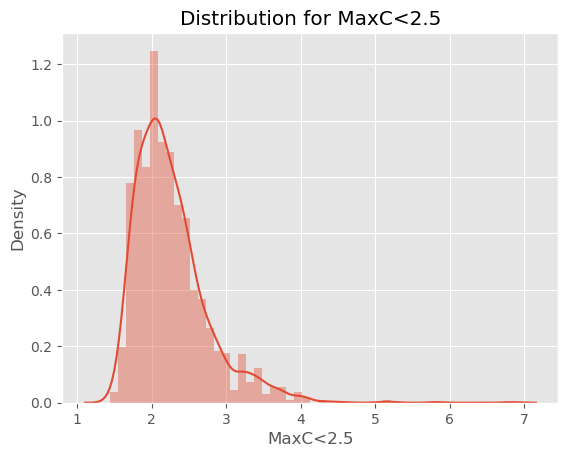

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


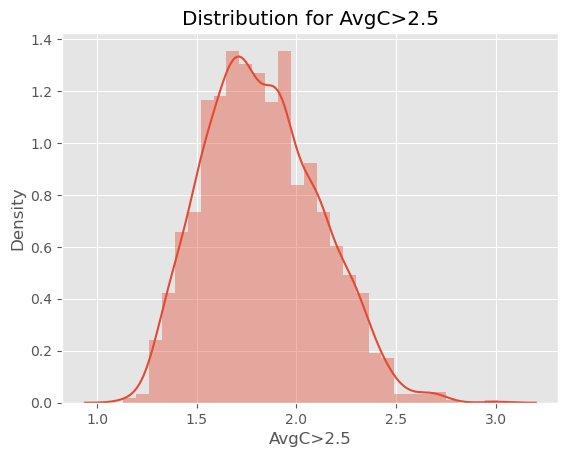

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


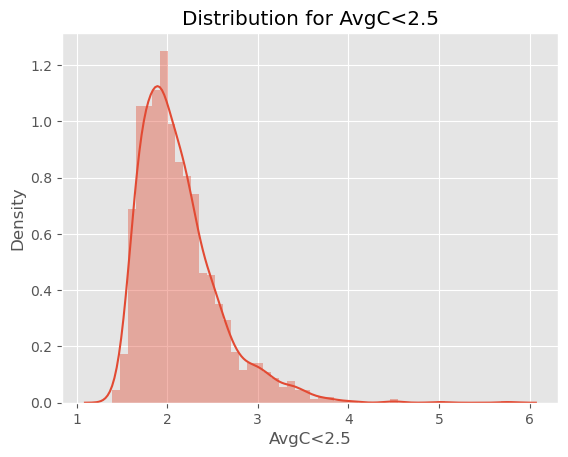

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


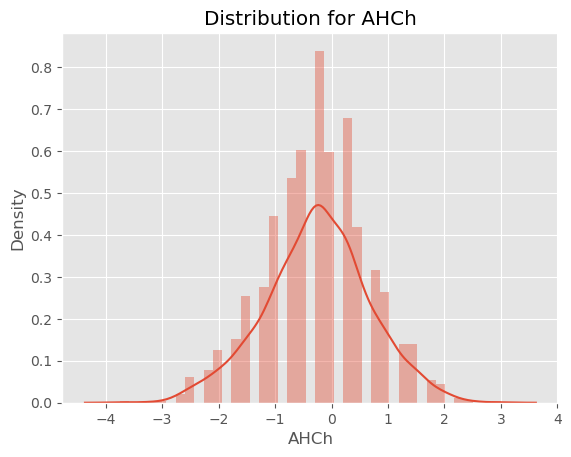

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


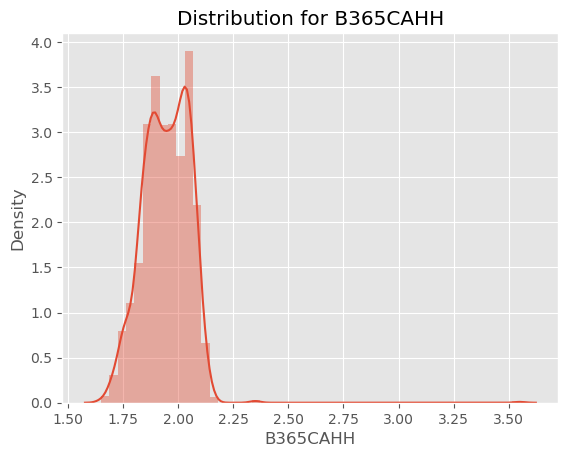

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


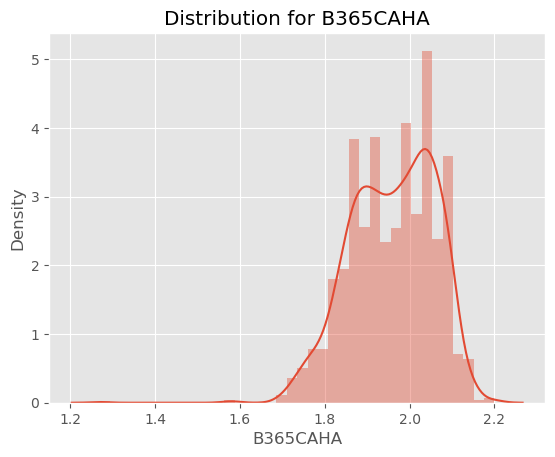

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


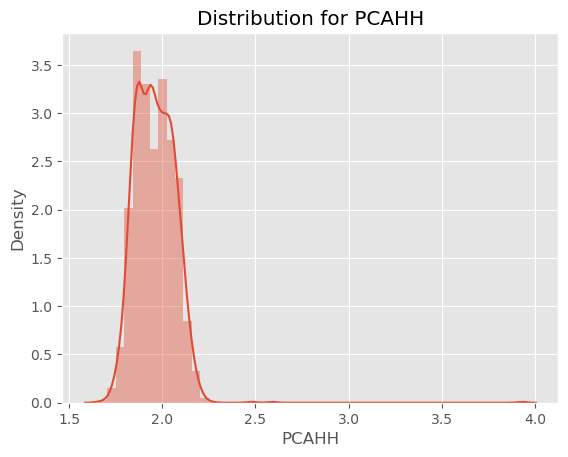

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


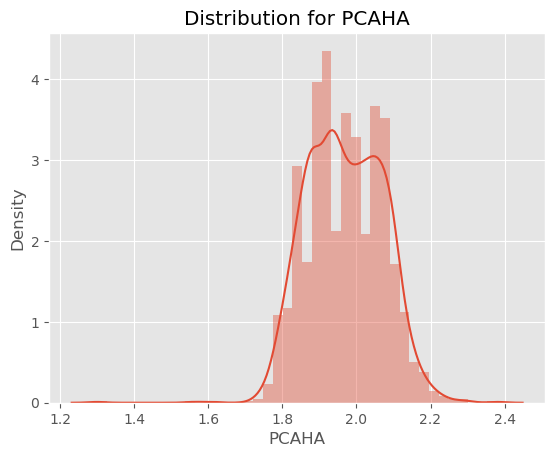

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


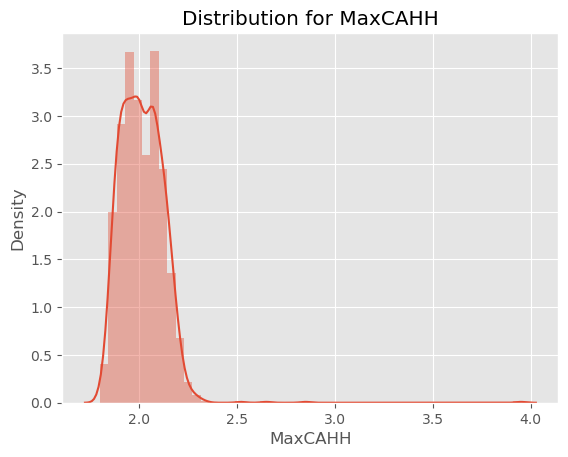

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


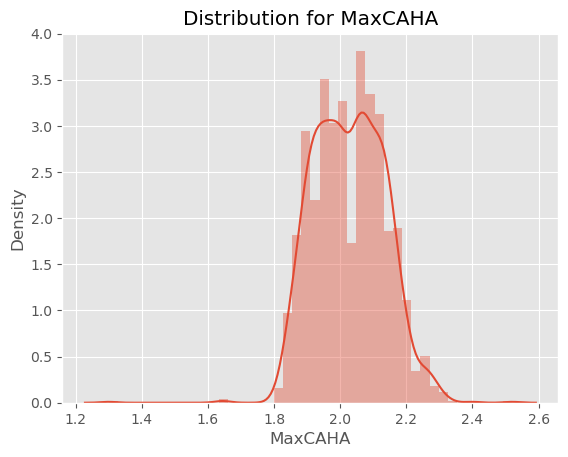

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


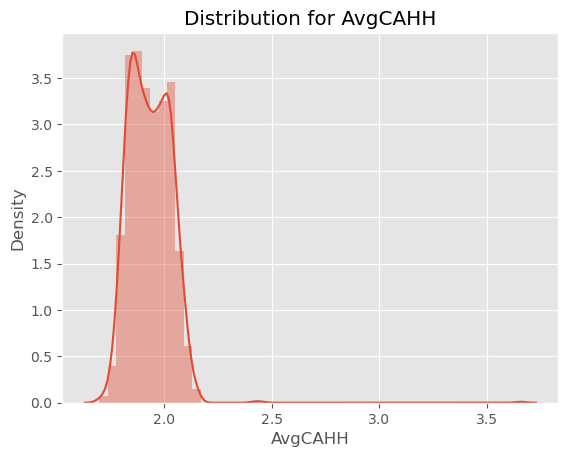

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


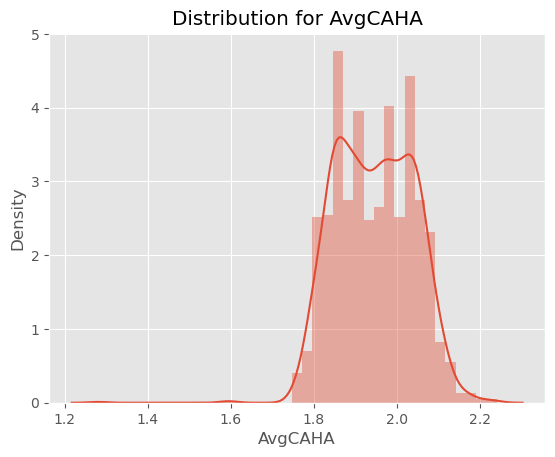

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


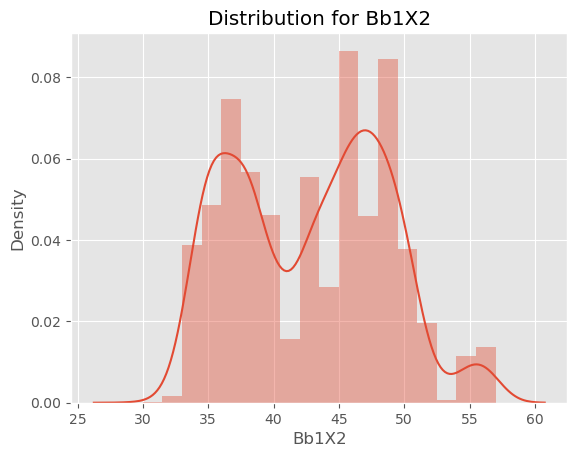

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


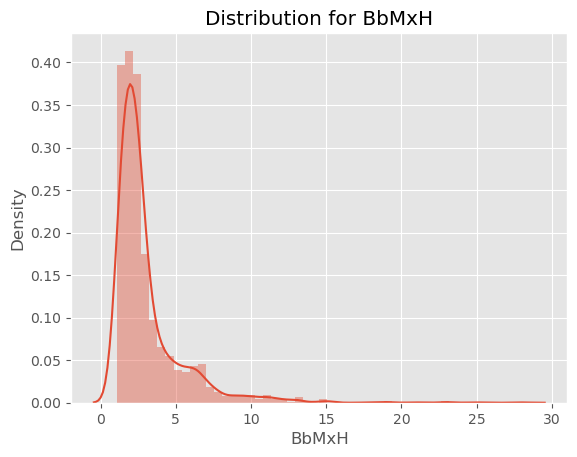

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


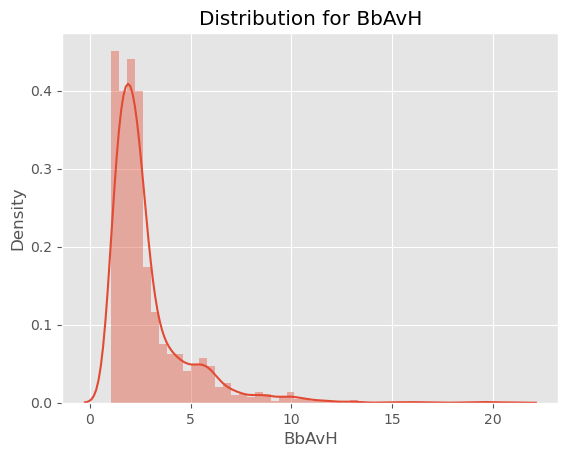

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


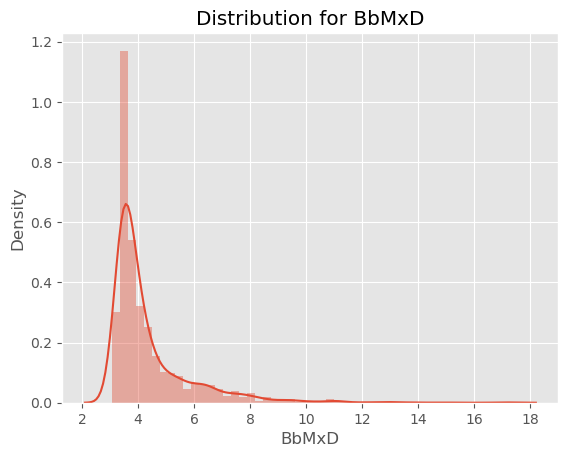

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


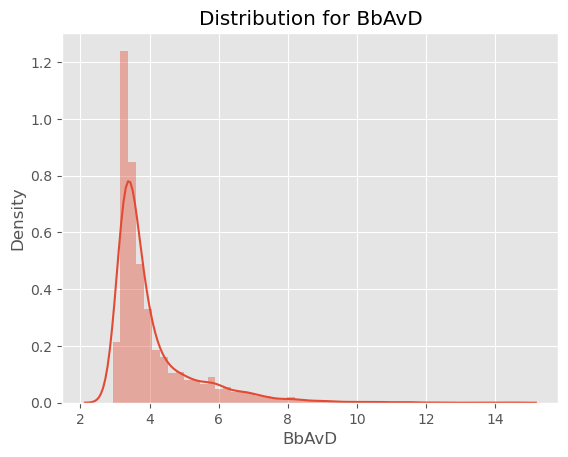

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


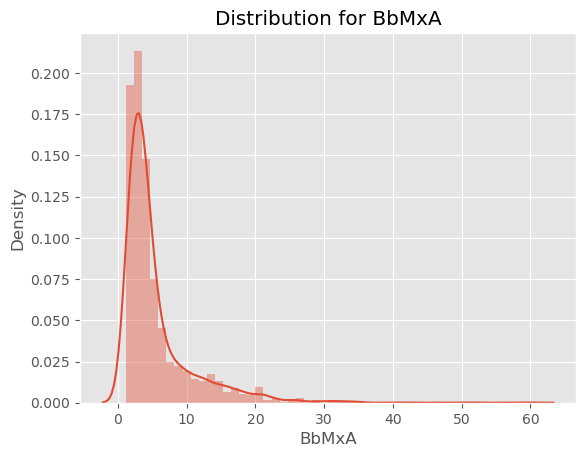

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


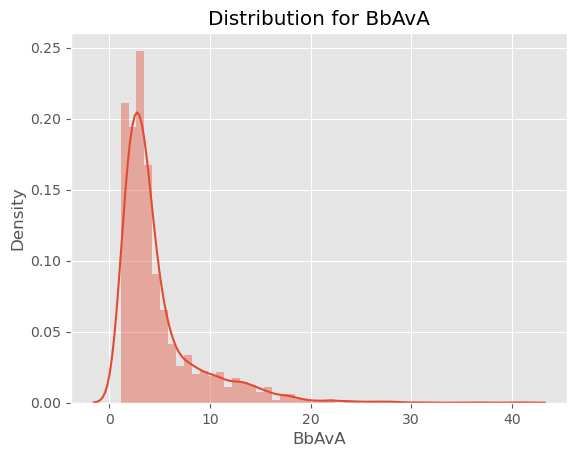

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


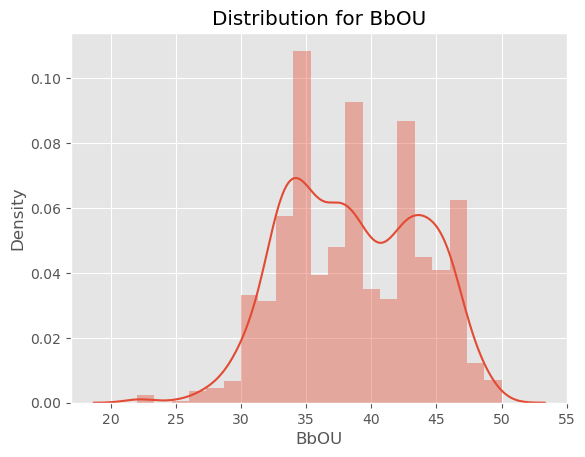

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


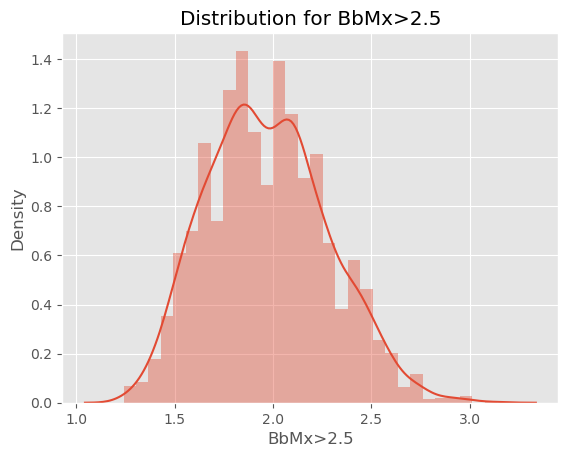

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


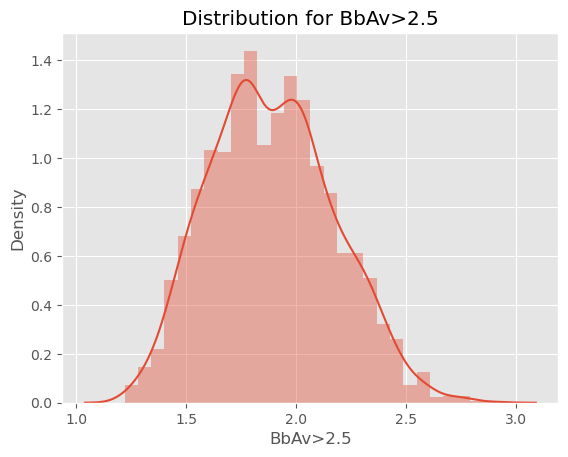

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


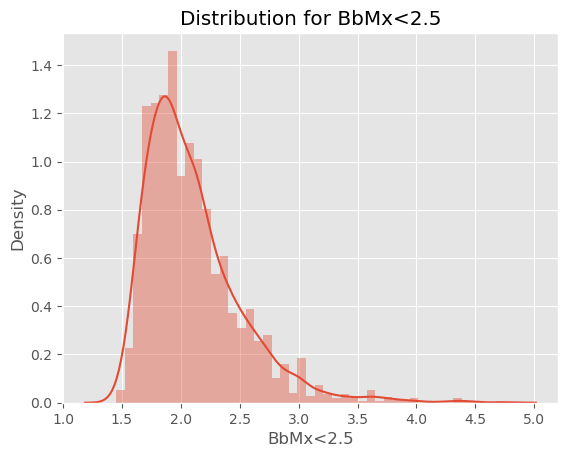

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


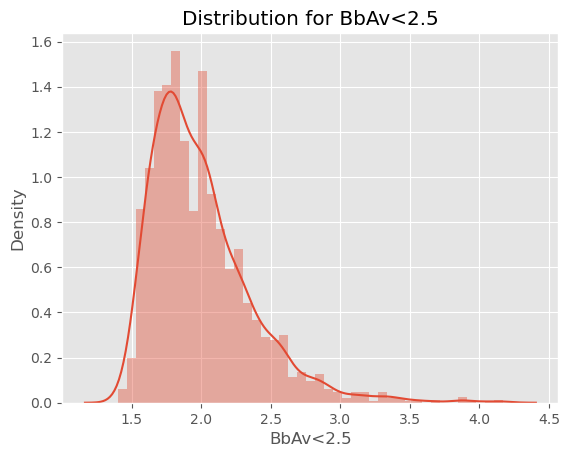

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


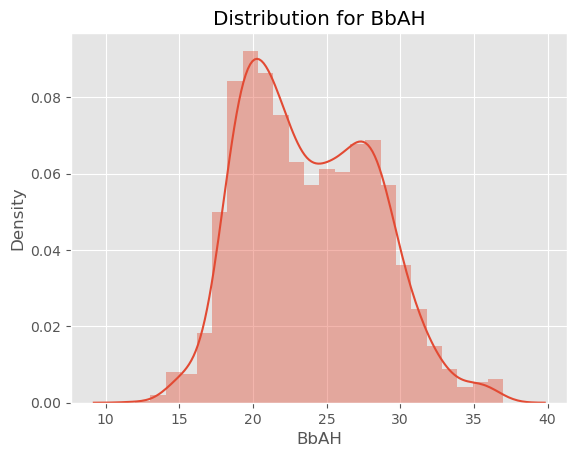

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


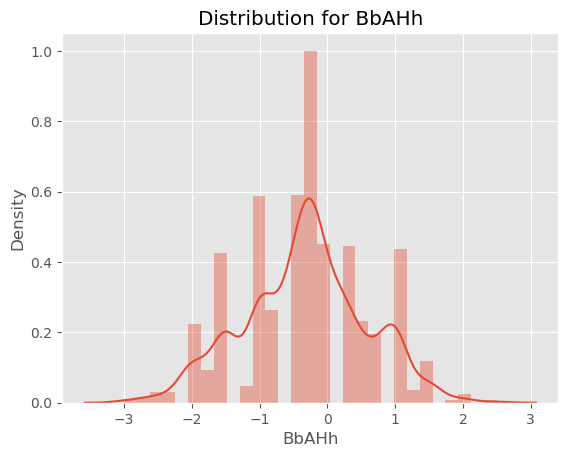

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


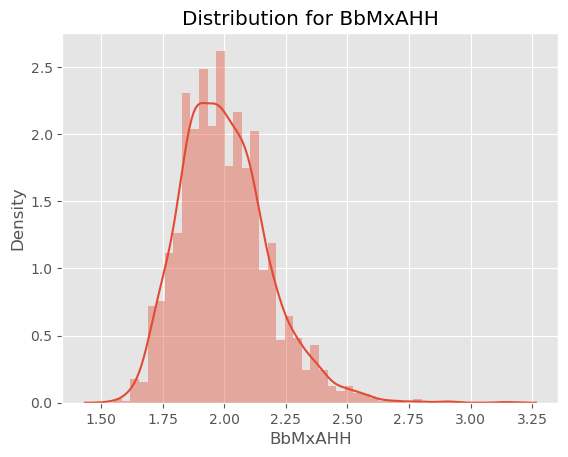

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


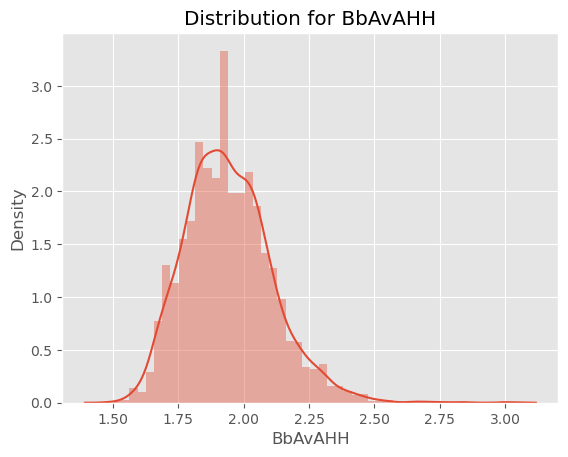

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


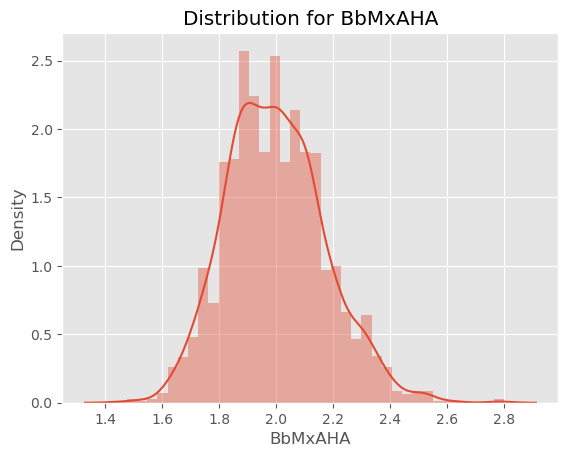

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


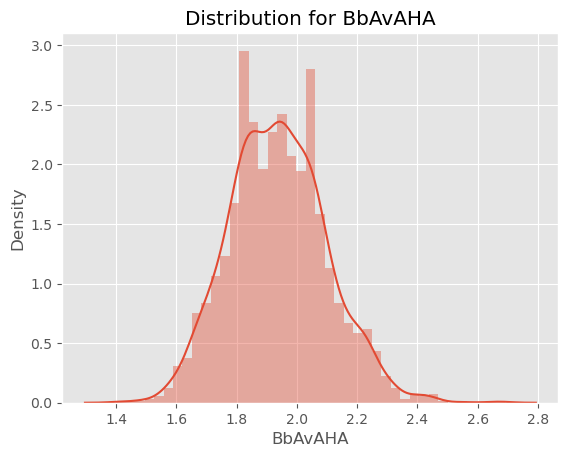

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


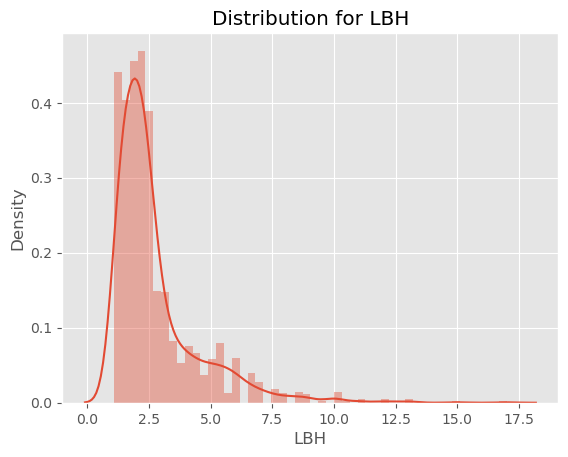

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


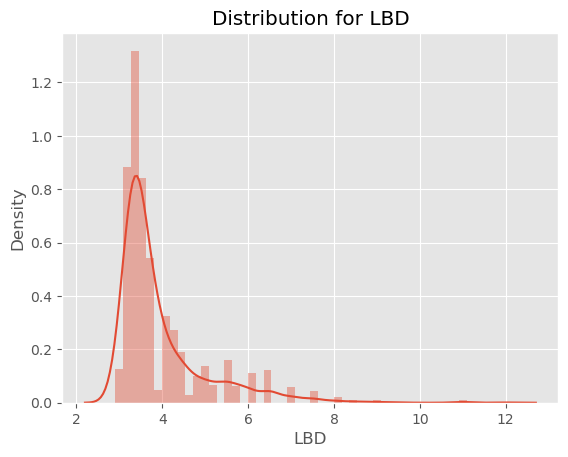

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


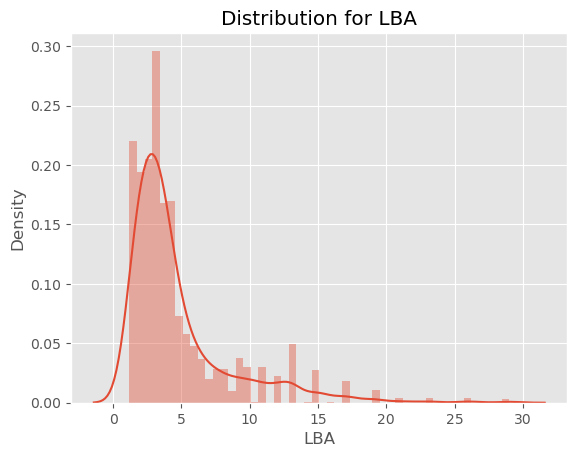

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


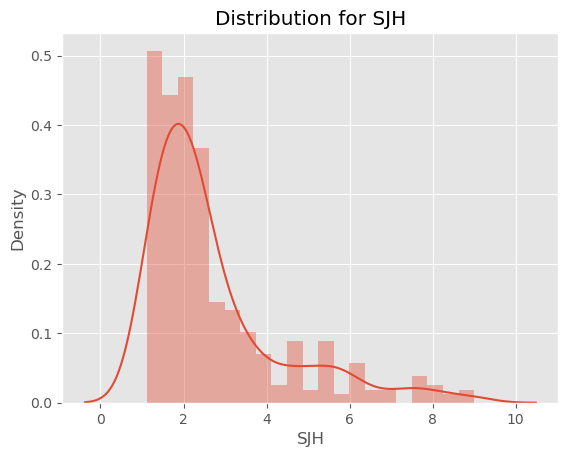

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


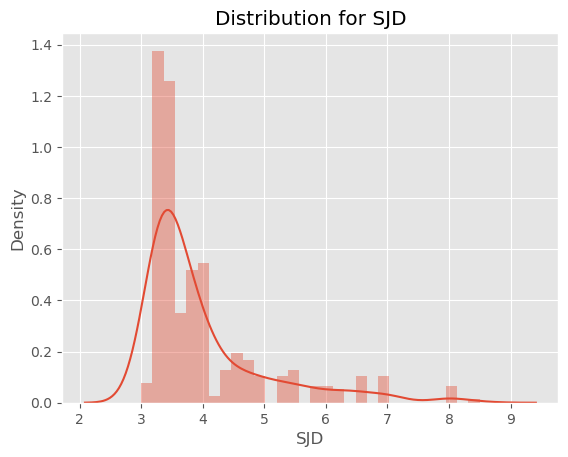

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


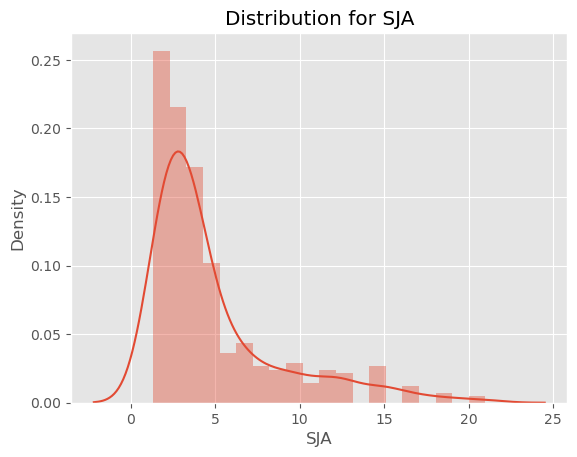

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


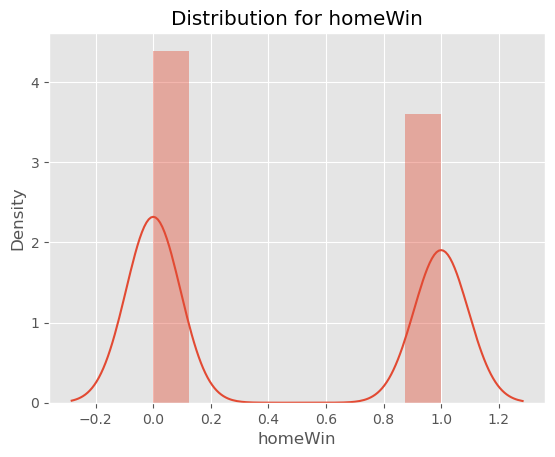

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


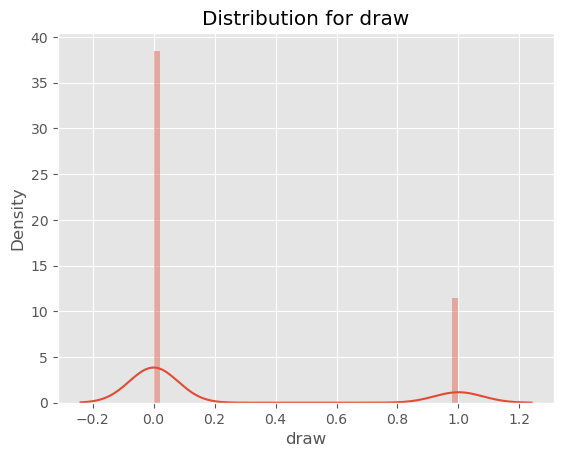

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\2883474996.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


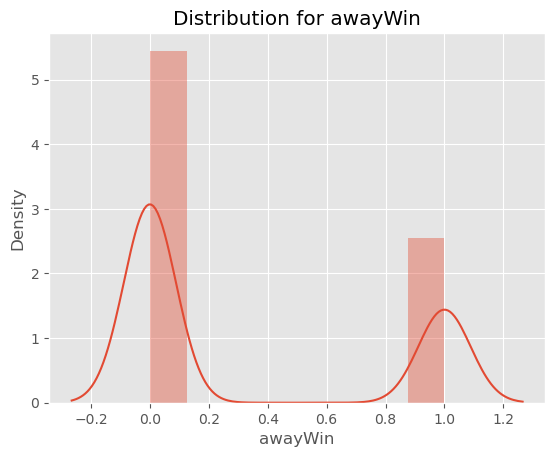

In [24]:
for col in df.select_dtypes('number').columns:
    sns.distplot(df[col])
    plt.title(f"Distribution for {col}")
    plt.show()

## Exploring Referee Home Ground Bias

Explore the influence of referees and home ground bias - understanding the correlation between both

In [25]:
print('Overall Home Win Rate: {:.4}%'.format(df.homeWin.mean() * 100))

top_10_refs = df.Referee.value_counts().head(10).index

df[df.Referee.isin(top_10_refs)].groupby('Referee').homeWin.mean().sort_values(ascending=False)

Overall Home Win Rate: 45.08%


Referee
L Mason       0.500000
J Moss        0.453782
M Dean        0.446215
A Taylor      0.444444
C Pawson      0.439331
M Oliver      0.435065
K Friend      0.431472
M Atkinson    0.428016
A Marriner    0.412017
P Tierney     0.397727
Name: homeWin, dtype: float64

It seems that L Mason may be the most influenced by the home crowd. Whilst the overall home win rate is 46.5%, the home win rate when he is the Referee is 51%. However it should be noted that this doesn't mean that he causes the win through bias. It could just be that he referees the best clubs, so naturally their home win rate is high.

*****

## Variable Correlation With Margin

Now to explore different variables' relationships with margin. First, we'll create a margin column, then pick a few different variables to look at the correlations amongst each other, using a correlation heatmap.

In [26]:
df['margin'] = df['FTHG'] - df['FTAG']

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\3781694966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['margin'] = df['FTHG'] - df['FTAG']


In [27]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'LBD', 'LBA', 'SJH', 'SJD', 'SJA', 'homeWin', 'draw', 'awayWin',
       'season', 'margin'],
      dtype='object', length=135)

In [28]:
stat_cols = ['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'HC', 'HF', 'HR', 'HS', 'HST', 'HTR', 'HY', 'margin']

stat_correlations = df[stat_cols].corr()
stat_correlations['margin'].sort_values()

C:\Users\mcelduffc\AppData\Local\Temp\ipykernel_6428\3304933025.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stat_correlations = df[stat_cols].corr()


AST      -0.482586
AS       -0.341411
HY       -0.136762
HR       -0.122180
AC       -0.096597
HF       -0.031555
AF       -0.003940
AY        0.007828
HC        0.092162
AR        0.102485
HS        0.314597
HST       0.515843
margin    1.000000
Name: margin, dtype: float64

Unsurprisingly, Home Shots on Target correlate the most with Margin, and Away Reds is also high. What is surprising is that Home Yellows has quite a strong negative correlation with margin - this may be because players will play more aggresively when they are losing to try and get the lead back, and hence receive more yellow cards.

Look at the heatmap between variables.

<Axes: >

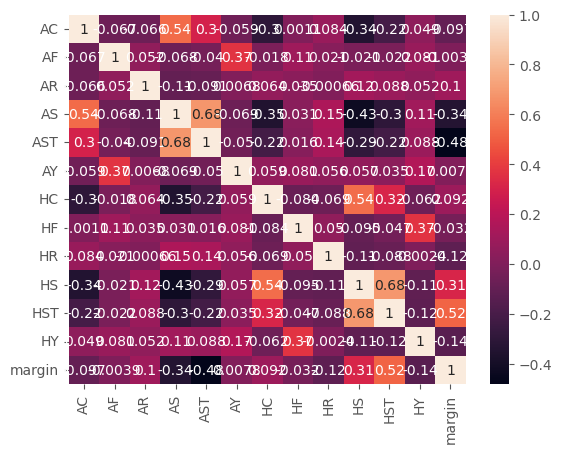

In [29]:
sns.heatmap(stat_correlations, annot=True, annot_kws={'size': 10})

*******

In [32]:
#df.to_csv('data/epl_data.csv')

## Analysing Features

I want to check the correlation between the features and winning.

In [33]:
df

Div       Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0     E0 2023-08-11  20:00      Burnley       Man City   0.0   3.0   A   0.0   
1     E0 2023-08-12  12:30      Arsenal  Nott'm Forest   2.0   1.0   H   2.0   
2     E0 2023-08-12  15:00  Bournemouth       West Ham   1.0   1.0   D   0.0   
3     E0 2023-08-12  15:00     Brighton          Luton   4.0   1.0   H   1.0   
4     E0 2023-08-12  15:00      Everton         Fulham   0.0   1.0   A   0.0   
...   ..        ...    ...          ...            ...   ...   ...  ..   ...   
4064  E0 2014-05-11    NaN      Norwich        Arsenal   0.0   2.0   A   0.0   
4065  E0 2014-05-11    NaN  Southampton     Man United   1.0   1.0   D   1.0   
4066  E0 2014-05-11    NaN   Sunderland        Swansea   1.0   3.0   A   0.0   
4067  E0 2014-05-11    NaN    Tottenham    Aston Villa   3.0   0.0   H   3.0   
4068  E0 2014-05-11    NaN    West Brom          Stoke   1.0   2.0   A   0.0   

      HTAG HTR    Referee    HS    AS   HST  AST    HF    AF    HC   AC   HY  \
0      2.0   A   C Pawson   6.0  17.0   1.0  8.0  11.0   8.0   6.0  5.0  0.0   
1      0.0   H   M Oliver  15.0   6.0   7.0  2.0  12.0  12.0   8.0  3.0  2.0   
2      0.0   D   P Bankes  14.0  16.0   5.0  3.0   9.0  14.0  10.0  4.0  1.0   
3      0.0   H    D Coote  27.0   9.0  12.0  3.0  11.0  12.0   6.0  7.0  2.0   
4      0.0   D  S Attwell  19.0   9.0   9.0  2.0  12.0   6.0  10.0  4.0  0.0   
...    ...  ..        ...   ...   ...   ...  ...   ...   ...   ...  ...  ...   
4064   0.0   D    L Mason  11.0  14.0   5.0  8.0   6.0   5.0   4.0  4.0  1.0   
4065   0.0   H     M Dean  15.0   8.0   6.0  2.0  16.0   5.0   6.0  2.0  3.0   
4066   2.0   A      C Foy  20.0   8.0   4.0  4.0  14.0  15.0   6.0  3.0  2.0   
4067   0.0   H     J Moss  12.0   4.0   6.0  1.0  11.0  11.0   5.0  1.0  1.0   
4068   1.0   A  L Probert  17.0  15.0   4.0  4.0   4.0   7.0  11.0  6.0  0.0   

       AY   HR   AR  B365H  B365D  B365A   BWH   BWD    BWA   IWH   IWD  \
0     0.0  1.0  0.0   8.00    5.5   1.33  8.75  5.25   1.34  8.00  5.50   
1     2.0  0.0  0.0   1.18    7.0  15.00  1.17  7.50  15.50  1.20  7.25   
2     4.0  0.0  0.0   2.70    3.4   2.55  2.65  3.40   2.55  2.70  3.45   
3     2.0  0.0  0.0   1.33    5.5   9.00  1.32  5.50   9.00  1.35  5.25   
4     2.0  0.0  0.0   2.20    3.4   3.30  2.20  3.40   3.25  2.25  3.40   
...   ...  ...  ...    ...    ...    ...   ...   ...    ...   ...   ...   
4064  0.0  0.0  0.0   4.50    3.8   1.85  4.00  3.50   1.87  4.00  3.60   
4065  2.0  0.0  0.0   2.63    3.5   2.80  2.60  3.30   2.60  2.60  3.20   
4066  3.0  0.0  0.0   2.30    3.4   3.40  2.20  3.40   3.10  2.00  3.30   
4067  0.0  0.0  0.0   1.50    4.5   7.50  1.45  4.50   6.25  1.45  4.00   
4068  0.0  0.0  0.0   2.10    3.6   3.75  2.00  3.40   3.60  2.10  3.30   

        IWA   PSH   PSD    PSA   WHH   WHD    WHA   VCH   VCD    VCA  MaxH  \
0      1.35  8.58  5.51   1.37  8.00  5.00   1.25  9.50  5.25   1.33  9.50   
1     14.00  1.18  7.86  15.67  1.12  6.50  12.00  1.14  7.50  17.00  1.21   
2      2.60  2.70  3.47   2.71  2.62  3.20   2.30  2.63  3.30   2.63  2.80   
3      8.50  1.33  5.65   9.61  1.25  4.60   8.50  1.29  5.25  10.00  1.36   
4      3.25  2.27  3.45   3.35  2.10  3.20   3.00  2.20  3.30   3.25  2.30   
...     ...   ...   ...    ...   ...   ...    ...   ...   ...    ...   ...   
4064   1.80  4.62  3.81   1.85  4.33  3.40   1.85  4.40  3.80   1.87   NaN   
4065   2.60  2.60  3.65   2.76  2.62  3.10   2.80  2.55  3.50   2.88   NaN   
4066   3.60  2.40  3.40   3.23  2.30  3.20   3.20  2.38  3.40   3.25   NaN   
4067   7.00  1.47  4.64   7.97  1.50  3.80   7.50  1.50  4.50   7.50   NaN   
4068   3.30  2.06  3.66   3.82  2.10  3.25   3.60  2.05  3.60   3.90   NaN   

      MaxD   MaxA  AvgH  AvgD   AvgA  B365>2.5  B365<2.5  ...  MaxCA  AvgCH  \
0     5.68   1.39  9.02  5.35   1.35      1.67      2.20  ...   1.36   9.27   
1     8.50  17.50  1.18  7.64  15.67      1.44      2.75  ...  19.00   1.19   
2     3.

In [35]:
# create a cleaned df of all the data
pre_features_df = create_df('data/epl_data.csv')

features = create_feature_df(pre_features_df)

C:\Users\mcelduffc\Documents\GitHub\EPL_Odds_Predictor\data_preparation_functions.py:65: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  .assign(Date=lambda df: pd.to_datetime(df.Date),
C:\Users\mcelduffc\Documents\GitHub\EPL_Odds_Predictor\data_preparation_functions.py:466: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_games = (historic_games.append(df[historic_games.columns])


Creating all games feature DataFrame


C:\Users\mcelduffc\Documents\GitHub\EPL_Odds_Predictor\data_preparation_functions.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  multi_line_df = home_df.append(away_df, sort=True).sort_values(by='gameIdHistoric').reset_index(drop=True)
C:\Users\mcelduffc\Documents\GitHub\EPL_Odds_Predictor\data_preparation_functions.py:419: RuntimeWarning: invalid value encountered in scalar divide
  .pipe(lambda df: (df.eloAgainst * df[goalsForOrAgainstCol]).sum() / df.eloAgainst.sum()))
C:\Users\mcelduffc\Documents\GitHub\EPL_Odds_Predictor\data_preparation_functions.py:419: RuntimeWarning: invalid value encountered in scalar divide
  .pipe(lambda df: (df.eloAgainst * df[goalsForOrAgainstCol]).sum() / df.eloAgainst.sum()))


Creating stats feature DataFrame


C:\Users\mcelduffc\Documents\GitHub\EPL_Odds_Predictor\data_preparation_functions.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append((old_stats_df[['gameId'] + away_stats_cols])


Creating odds feature DataFrame


KeyError: "['BbAHh', 'BbAvAHH', 'BbAvAHA', 'BbAv<2.5', 'BbAv>2.5'] not in index"